<a href="https://colab.research.google.com/github/KPxto/bootcamp-alura/blob/master/BootcampDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootcamp Alura - Semana 1

### **Aula 01**

### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from io import StringIO
import datetime 

%matplotlib inline
plt.style.use('fivethirtyeight')
import collections

### Carregando nosso dataset

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv'
dados = pd.read_csv(url, encoding='latin1', sep=';',
              skiprows=3, skipfooter=12, thousands='.', decimal=',')


<ipython-input-2-90790d0a6cc4>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados = pd.read_csv(url, encoding='latin1', sep=';',


In [3]:
# setando opção de visualização do número
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# visualizando as 5 primeiras linhas 
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,305010883.18
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,39911193.02,4437115730.71


In [5]:
# media de todo DF
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

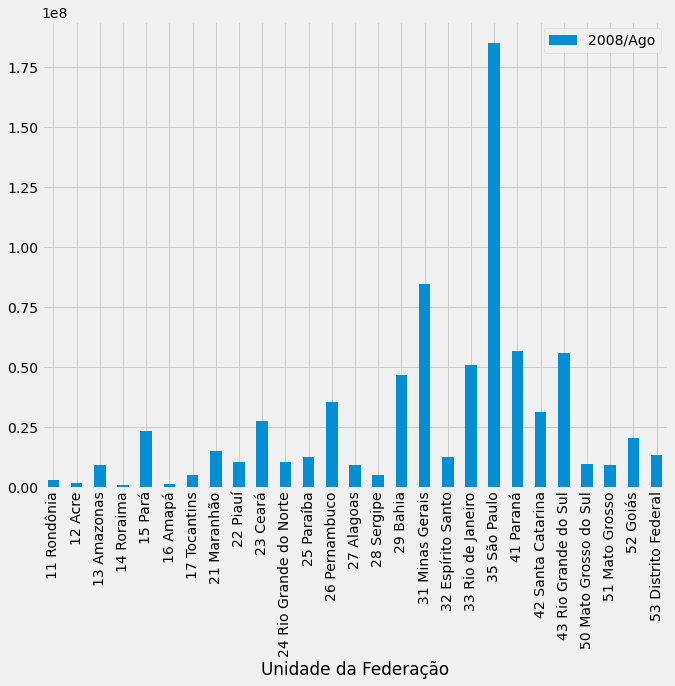

In [6]:
# plotando um grafico simples com pandas
dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(10,8));

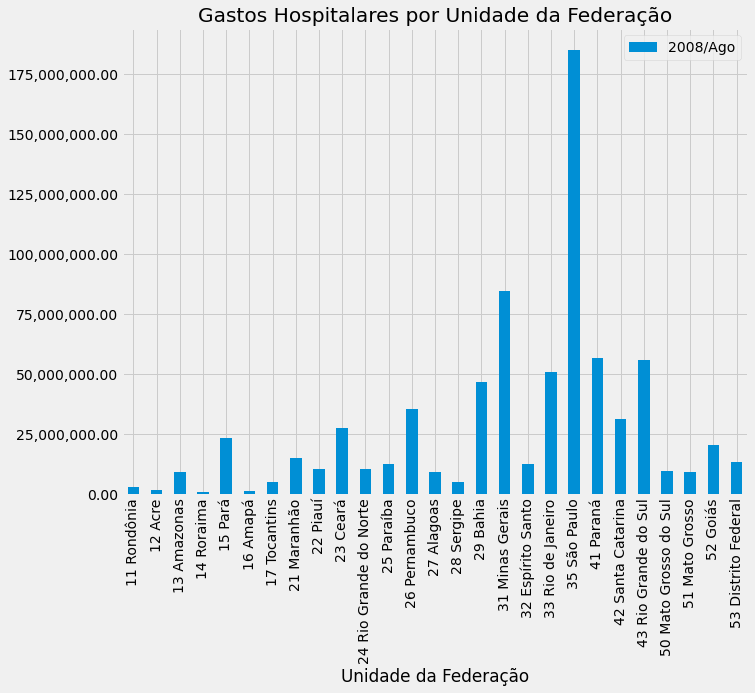

In [7]:
# alterando o grafico anterior com matplotlib e analisando dados do mes mais recente
ax = dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(10,8))
# codigo para alterar formatação dos ticks do eixo y para 2 casas decimais
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) 
plt.title('Gastos Hospitalares por Unidade da Federação');

In [8]:
# verificando nossos dados vemos que temos 2 colunas como objeto, quando deveriamos ter somente 1, a dos estados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


In [9]:
# vamos ver quais colunas objeto sao essas
dados.select_dtypes(exclude='number')

,Unidade da Federação,2009/Set,2020/Ago
0,11 Rondônia,3605007.43,10285455.78
1,12 Acre,-,-
2,13 Amazonas,9730634.16,14726443.67
3,14 Roraima,1701611.25,2826486.18
4,15 Pará,27967969.22,39911193.02
5,16 Amapá,2034329.78,2942273.94
6,17 Tocantins,6542918.14,8240261.38
7,21 Maranhão,19722895.51,28587541.78
8,22 Piauí,12247027.29,23210624.20
9,23 Ceará,34471579.06,59808605.59


In [10]:
# vamos padronizar a coluna 2009/Set para ficar igual as outras do conjunto de dados
dados.replace('-', 0, inplace=True)
dados['2009/Set'] = dados['2009/Set'].astype(float)

In [11]:
# verificando novamente, nosso problema foi resolvido
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(152), object(2)
memory usage: 32.6+ KB


In [12]:
dados.select_dtypes(exclude='number')

,Unidade da Federação,2020/Ago
0,11 Rondônia,10285455.78
1,12 Acre,0
2,13 Amazonas,14726443.67
3,14 Roraima,2826486.18
4,15 Pará,39911193.02
5,16 Amapá,2942273.94
6,17 Tocantins,8240261.38
7,21 Maranhão,28587541.78
8,22 Piauí,23210624.20
9,23 Ceará,59808605.59


### **Aula 02**

### Vamos carregar o proximo dataset 

In [13]:
# vamos pegar os dados do url disponibilizado pela Alura
url2 = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv'
dados2 = pd.read_csv(url2, encoding='latin1', sep=';', skiprows=3, skipfooter=12, thousands='.', decimal=',')

<ipython-input-13-a5e57df6992b>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados2 = pd.read_csv(url2, encoding='latin1', sep=';', skiprows=3, skipfooter=12, thousands='.', decimal=',')


In [14]:
dados2.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


In [15]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(157), object(123)
memory usage: 59.2+ KB


In [16]:
# visualizando 2 colunas
dados2[['2008/Ago', '2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [17]:
# aplicando a media para retornar um subset de valores nao nulos
# depois pegaremos somente os indices
# esses indices formarao uma lista com as colunas desejadas
# para completar a lista, vamos inserir o valor referindo-se aos estados 
colunas_usaveis = dados2.mean().index.to_list()
colunas_usaveis.insert(0, 'Unidade da Federação')

In [18]:
# criando novo dataframe a partir do subset anterior
usaveis = dados2[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,305010883.18
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4437115730.71


In [19]:
# setando o novo indice com os estados sendo as chaves
usaveis.set_index('Unidade da Federação', inplace=True)

In [20]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,305010883.18
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4437115730.71


### Plotando um grafico do meu estado

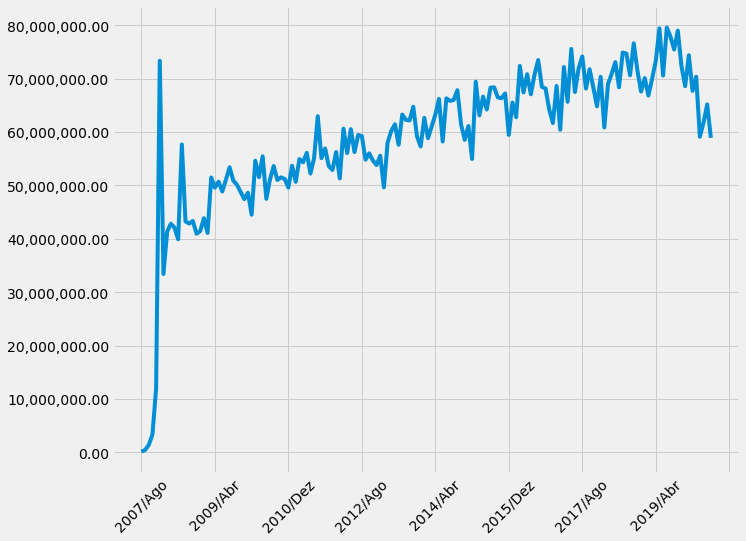

In [21]:
bahia = usaveis.loc['29 Bahia']
del bahia['Total']
ax = bahia.plot(x=bahia.index, y=bahia.values, figsize=(10,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(rotation=45);

<AxesSubplot:>

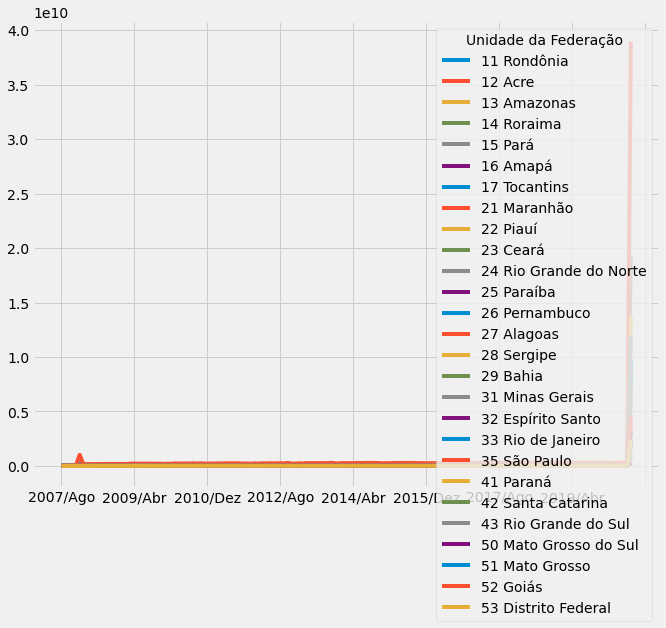

In [22]:
# aqui vamos transpor nosso df para que as datas fiquem no eixo x
# vemos que os ultimos valores do grafico tem uma subida brusca
# esta subida deve-se a coluna 'Total', que distorce a visualização
usaveis.T.plot(figsize=(10,8))

In [23]:
# vamos excluir a coluna total
usaveis = usaveis.drop('Total', axis=1)

<AxesSubplot:>

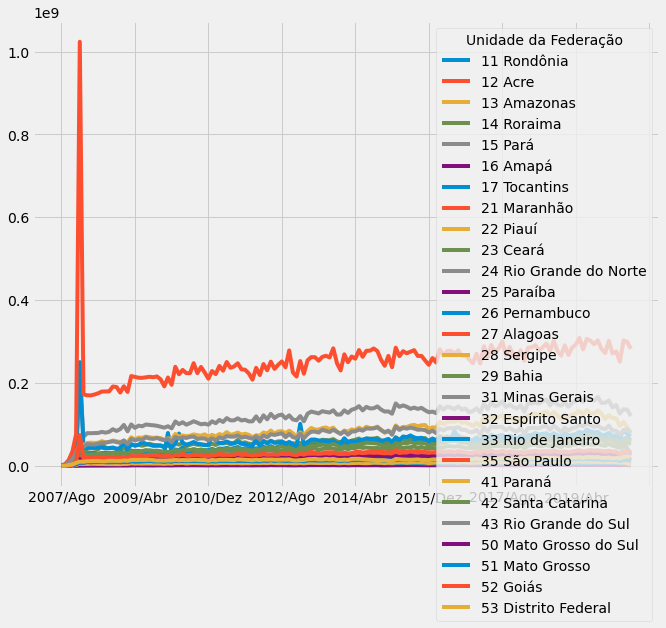

In [24]:
usaveis.T.plot(figsize=(10,8))

### Reposicionar a legenda

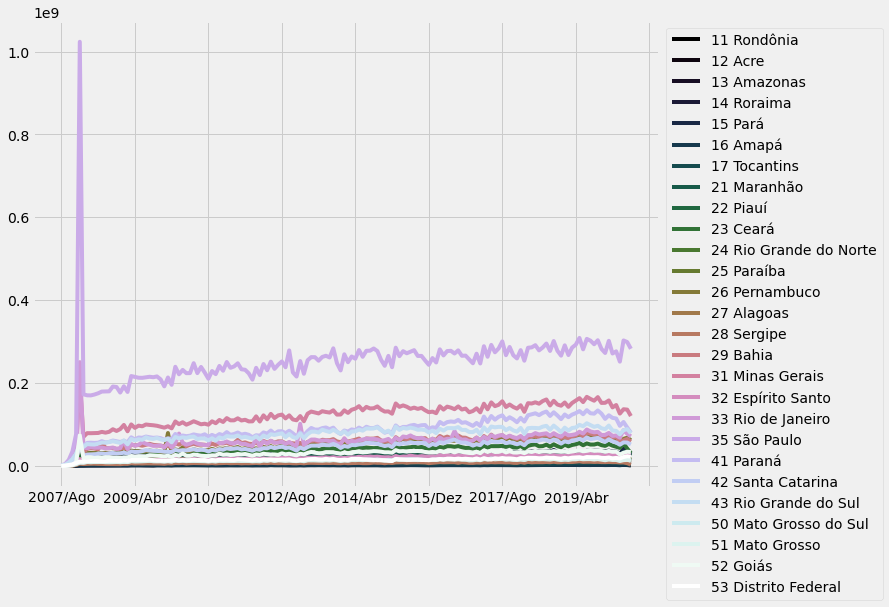

In [25]:
cm = plt.get_cmap('cubehelix')
usaveis.T.plot(figsize=(10,8), cmap=cm)
plt.legend(bbox_to_anchor=(1, 1));

### Verificando os 5 maiores gastadores

In [26]:
# vamos pegar os 5 maiores gastadores
top5 = usaveis.sum(axis=1).nlargest(5).index.to_list()

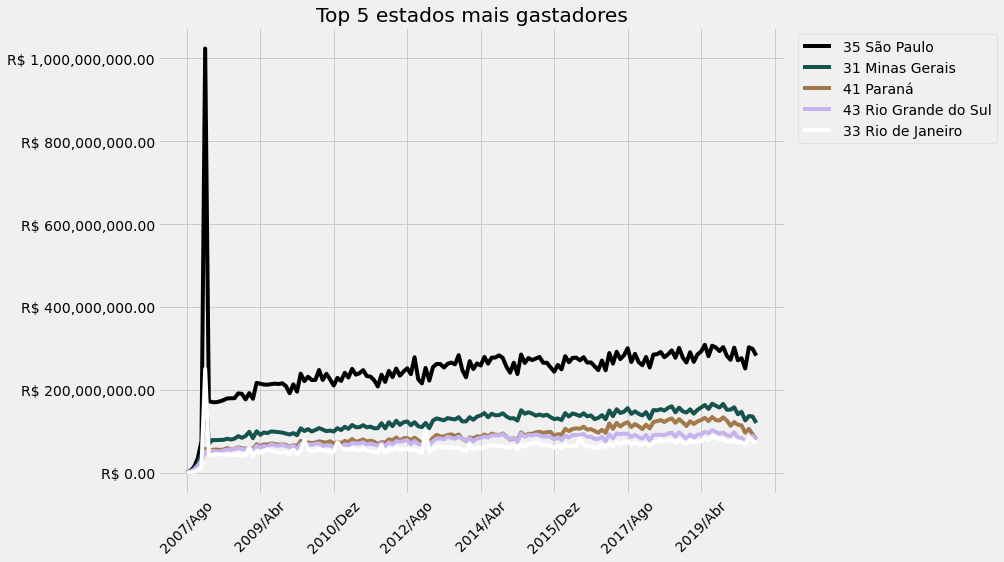

In [27]:
ax = usaveis.loc[top5].T.plot(figsize=(10,8), colormap='cubehelix')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.legend(bbox_to_anchor=(1.35, 1))
plt.xticks(rotation=45)
plt.title('Top 5 estados mais gastadores');

## **Aula 03**

### Criando nova coluna de região

In [28]:
# vamos colocar os estados numa lista para que possamos percorre-la
# depois vamos criar uma formula que vai atribuir a regiao de cada estado
lista_estados = usaveis.index.to_list()
def regiao(ls):
  for i in ls:
    if i[0]=='1':
      return 'Norte'
    if i[0]=='2':
      return 'Nordeste'
    if i[0]=='3':
      return 'Sudeste'
    if i[0]=='4':
      return 'Sul'
    if i[0]=='5':
      return 'Centro Oeste'

In [29]:
# vamos criar a nova coluna usando a função map
usaveis['Regiao'] = list(map(regiao, lista_estados))

In [30]:
# demonstração de que nosso código funcionou
usaveis.sample(10)['Regiao']

Unidade da Federação
33 Rio de Janeiro            Sudeste
12 Acre                        Norte
43 Rio Grande do Sul             Sul
25 Paraíba                  Nordeste
22 Piauí                    Nordeste
11 Rondônia                    Norte
52 Goiás                Centro Oeste
31 Minas Gerais              Sudeste
17 Tocantins                   Norte
16 Amapá                       Norte
Name: Regiao, dtype: object

In [31]:
# vamos calcular a média de gastos por região
# depois vamos transpor a tabela para facilitar na plotagem do gráfico
media_regiao = usaveis.groupby('Regiao').mean().T

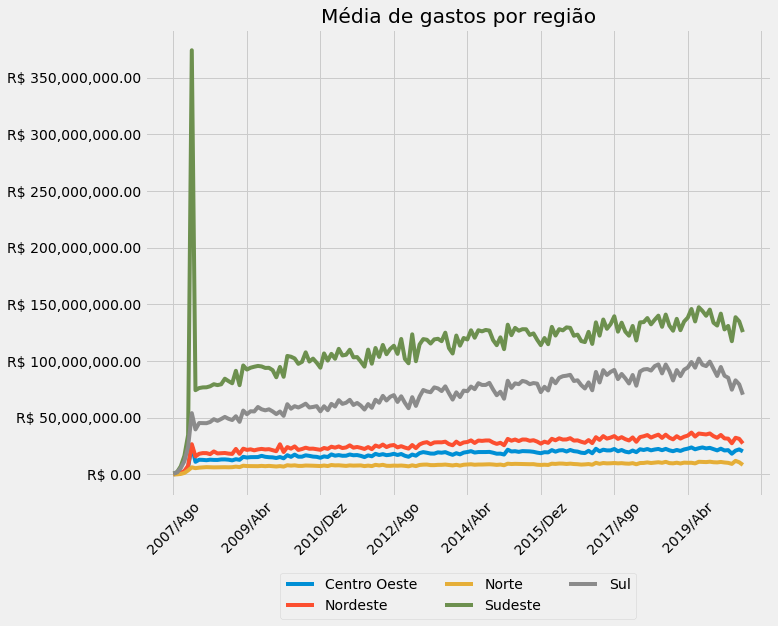

In [32]:
# aqui vamos plotar nosso gráfico
ax = media_regiao.plot(figsize=(10,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.legend(bbox_to_anchor=(0.5, -0.15), loc ='upper center', ncol=3)
plt.title('Média de gastos por região')
plt.xticks(rotation=45);

### Comparação entre os top5 gastadores com o estado da Bahia

In [33]:
# adicionando o item Bahia a lista do top5
top5.insert(0, '29 Bahia')

In [34]:
# criando um dataframe a partir das colunas na lista top5
top5mais1 = usaveis.loc[top5].T
top5mais1.drop('Regiao', axis=0, inplace=True)

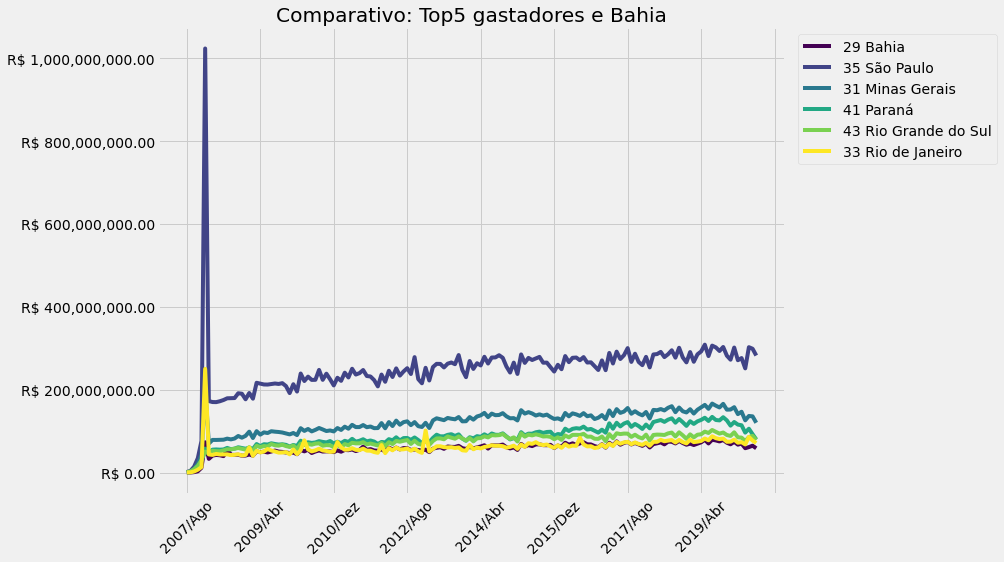

In [35]:
# hora de plotar
ax = top5mais1.plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.legend(bbox_to_anchor=(1.35, 1))
plt.xticks(rotation=45)
plt.title('Comparativo: Top5 gastadores e Bahia');

### Selecionando dados a partir de Fevereiro de 2008

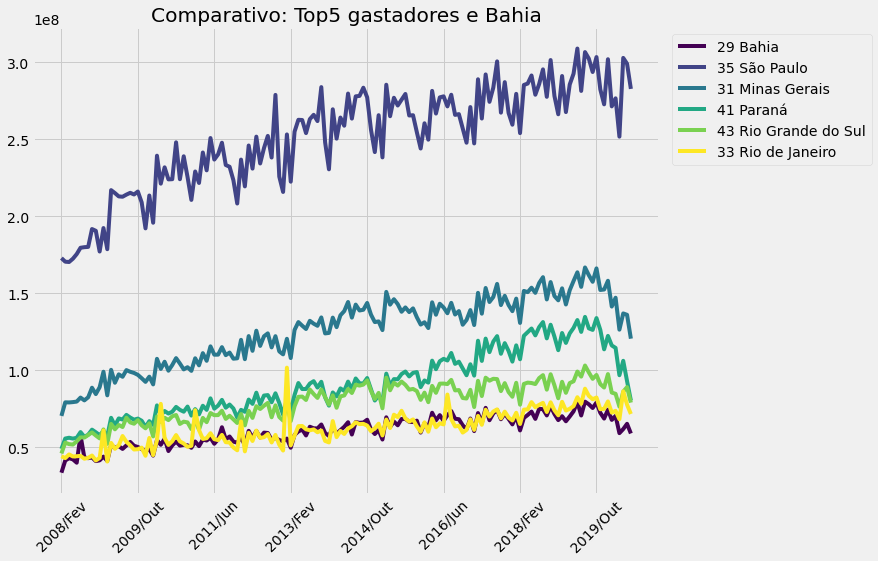

In [36]:
# aqui vamos iniciar a contagem a partir de Fevereiro de 2008
top5mais1.loc['2008/Fev':].plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.legend(bbox_to_anchor=(1.35, 1))
plt.xticks(rotation=45)
plt.title('Comparativo: Top5 gastadores e Bahia');

### Plotar só os estados da região sudeste e ver se os estados foram afetados de forma similar entre 2012/2013

In [37]:
# primeiro vamos capturar somente os estados do sudeste
# pegamos a partir de Fev de 2008 pq é a partir daí que tem dados válidos
sudeste = usaveis.loc[:,'2008/Fev':].groupby('Regiao').get_group('Sudeste')
sudeste.drop('Regiao', axis=1, inplace=True) # essa linha não vai servir pra nada

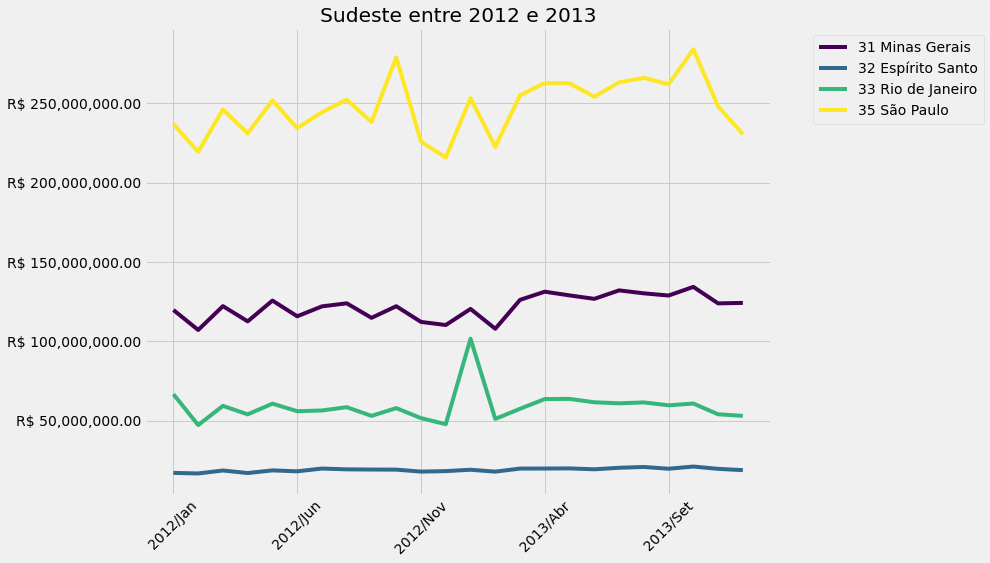

In [38]:
# agora selecionamos a data para entre Jan de 2012 e Dez de 2013
ax = sudeste.T.loc['2012/Jan':'2013/Dez'].plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.legend(bbox_to_anchor=(1.35, 1))
plt.xticks(rotation=45)
plt.title('Sudeste entre 2012 e 2013');

In [39]:
# agora vamos adicionar mais um estado para fazer o comparativo
bahia = usaveis.T.loc['2008/Fev':]['29 Bahia']
bahia.drop('Regiao', axis=0, inplace=True)
sudeste = sudeste.append(bahia).T

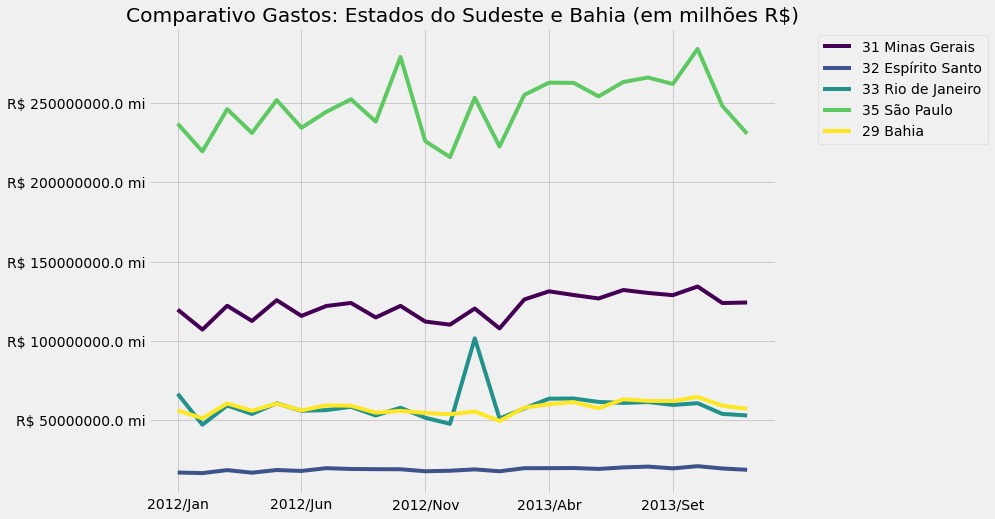

In [40]:
# agora vamos plotar
ax = sudeste.loc['2012/Jan':'2013/Dez'].plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x} mi'))
plt.legend(bbox_to_anchor=(1.35, 1.))
plt.annotate('Incremento repentino em Janeiro de 2013', xy=(12.0, 97.0), xytext=(15.0, 100.0), arrowprops=dict(facecolor='black', shrink=0.05));
plt.title('Comparativo Gastos: Estados do Sudeste e Bahia (em milhões R$)');

## **Aula 04**

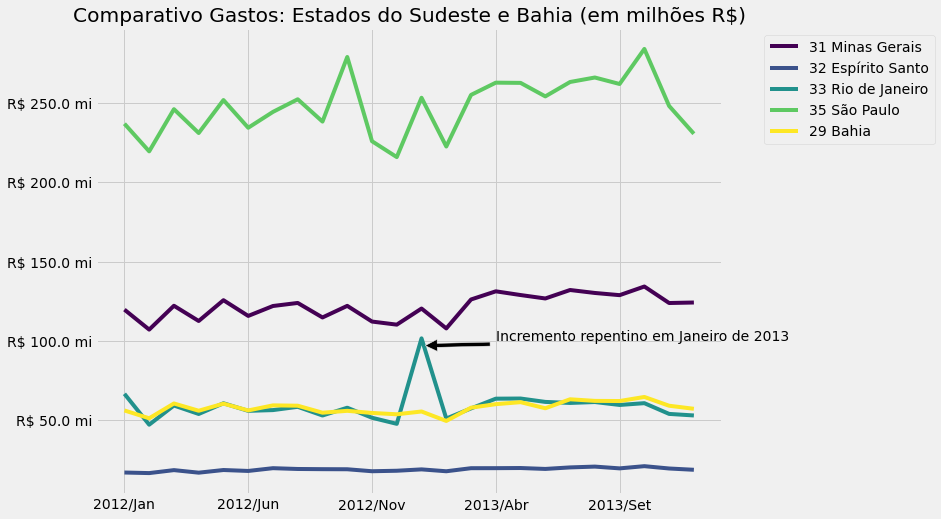

In [41]:
# vamos plotar o grafico novamente, mas melhorando o eixo y
# veja que dividimos os valores por um milhao para melhor legibilidade
ax = (sudeste.loc['2012/Jan':'2013/Dez']/1000000).plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:} mi"))
plt.legend(bbox_to_anchor=(1.35, 1.))
plt.annotate('Incremento repentino em Janeiro de 2013', xy=(12.0, 97.0), xytext=(15.0, 100.0), arrowprops=dict(facecolor='black', shrink=0.05));
plt.title('Comparativo Gastos: Estados do Sudeste e Bahia (em milhões R$)');

Manipulando um pouco o eixo Y da para perceber a distorção causada na comparação dos dados, trazendo desinformação. O valor inicial do eixo y foi colocado como 50, trazendo dados de alguns bem abaixo do grafico, causando uma ilusão de maior distanciamento do que o real entre os menos gastadores e os mais gastadores.

Um olhar desatento para o gráfico (sem fazer a leitura) mostra que SP gastou umas 4 vezes mais que RJ em Janeiro de 2013.

No entanto, ao fazer a devida leitura, somos informados que a diferença de gastos é de 2.5 vezes.

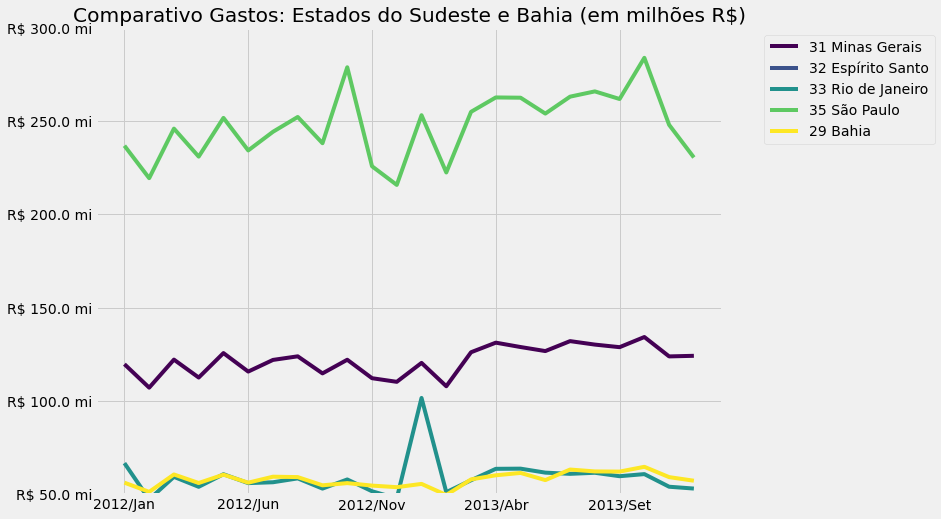

In [42]:
# vamos plotar o grafico novamente, mas melhorando o eixo y
# veja que dividimos os valores por um milhao para melhor legibilidade
ax = (sudeste.loc['2012/Jan':'2013/Dez']/1000000).plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:} mi"))
plt.ylim([50, 300])
plt.legend(bbox_to_anchor=(1.35, 1.))
plt.title('Comparativo Gastos: Estados do Sudeste e Bahia (em milhões R$)');

## **Aula 05**

In [43]:
usaveis['Total'] = usaveis.sum(axis=1)

In [44]:
# vamos criar o dataframe organizando as linhas por total de gasto em ordem decrescente
ordenado_por_total = usaveis.sort_values('Total', ascending=False)
ordenado_por_total.drop(['Total', 'Regiao'], axis=1, inplace=True)

In [45]:
# aqui vamos pegar o ultimo mes (ultima coluna)
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2020/Jul'

In [46]:
# vamos pegar os gastos mais recentes de todos estados
gastos_mais_recentes = ordenado_por_total[mes_mais_recente]
gastos_mais_recentes.head()

Unidade da Federação
35 São Paulo           282709570.31
31 Minas Gerais        120467187.34
41 Paraná               80320852.69
43 Rio Grande do Sul    78929703.81
33 Rio de Janeiro       71540227.33
Name: 2020/Jul, dtype: float64

Plotando em pizza para comprovar como modelo de grafico e ineficiente:
- muita bagunça nas legendas
- impossível de comparar valores e grandezas
- sem precisão nenhuma
- cores repetidas
- ruim para definir ordem
- nao da para saber os valores absolutos

<AxesSubplot:ylabel='2020/Jul'>

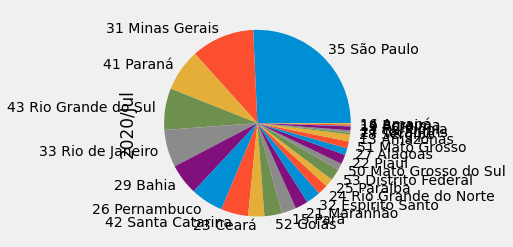

In [47]:
gastos_mais_recentes.plot(kind='pie')

Uma simples tabela é melhor para comparar grandezas.
Tomemos o estado do RJ por exemplo. Basta dividirmos o gasto de cada estado pelo gasto do RJ e teremos os valores relativos.

In [48]:
gastos_mais_recentes / gastos_mais_recentes['33 Rio de Janeiro']

Unidade da Federação
35 São Paulo             3.95
31 Minas Gerais          1.68
41 Paraná                1.12
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.00
29 Bahia                 0.82
26 Pernambuco            0.87
42 Santa Catarina        0.72
23 Ceará                 0.43
52 Goiás                 0.47
15 Pará                  0.39
21 Maranhão              0.34
32 Espírito Santo        0.38
24 Rio Grande do Norte   0.27
25 Paraíba               0.22
53 Distrito Federal      0.31
50 Mato Grosso do Sul    0.17
22 Piauí                 0.25
27 Alagoas               0.18
51 Mato Grosso           0.18
13 Amazonas              0.19
28 Sergipe               0.05
17 Tocantins             0.06
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.04
16 Amapá                 0.03
Name: 2020/Jul, dtype: float64

Seguindo o desafio da aula 5, vamos comparar os gastos da Bahia com o das outras unidades da federação.
Vamos deixar o valores organizados em ordem decrescente.
<br>
<br>
**desafio: criar tabela de comparação com seu estado (ou estado de preferência)**

In [49]:
(gastos_mais_recentes / gastos_mais_recentes['29 Bahia']).sort_values(ascending=False)

Unidade da Federação
35 São Paulo             4.80
31 Minas Gerais          2.05
41 Paraná                1.36
43 Rio Grande do Sul     1.34
33 Rio de Janeiro        1.21
26 Pernambuco            1.06
29 Bahia                 1.00
42 Santa Catarina        0.88
52 Goiás                 0.57
23 Ceará                 0.52
15 Pará                  0.47
32 Espírito Santo        0.47
21 Maranhão              0.41
53 Distrito Federal      0.38
24 Rio Grande do Norte   0.33
22 Piauí                 0.31
25 Paraíba               0.26
13 Amazonas              0.23
27 Alagoas               0.22
51 Mato Grosso           0.22
50 Mato Grosso do Sul    0.21
11 Rondônia              0.13
17 Tocantins             0.08
28 Sergipe               0.06
14 Roraima               0.05
16 Amapá                 0.04
12 Acre                  0.02
Name: 2020/Jul, dtype: float64

Vamos ver a tabela acima representada num grafico de barras.
<br><br>
Ainda comparando com o grafico de pizza, veja como o grafico em barra é mais claro para visualização dos dados.

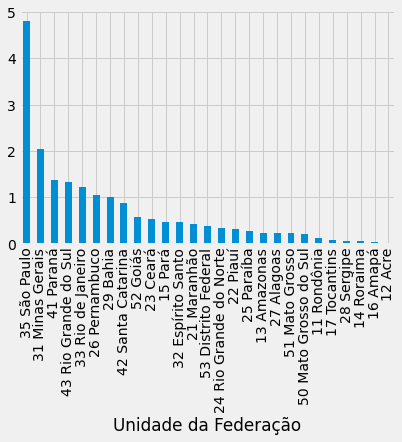

In [50]:
(gastos_mais_recentes / gastos_mais_recentes['29 Bahia']).sort_values(ascending=False).plot(kind='bar');

Continuando a brincadeira com a eficiência do grafico em barras, veja os top10 gastadores.

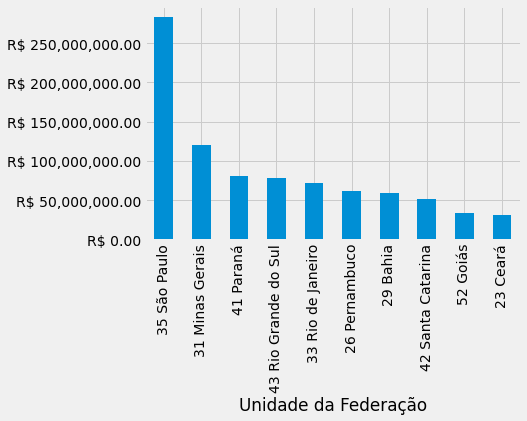

In [51]:
ax = gastos_mais_recentes.head(10).sort_values(ascending=False).plot(kind='bar')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'));

desafio: comparar gastos por estado comparando com respectivas populações

In [52]:
# vamos pegar a tabela de população por estado da página da wikipedia
url_wiki = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
populacao_por_estado = pd.read_html(url_wiki)[0]
populacao_por_estado = populacao_por_estado[['Unidade federativa', 'População']]
populacao_por_estado.sort_values('Unidade federativa', inplace=True)

In [53]:
# aqui vamos limpar o nome dos estados tirando o numero que vem no inicio
gastos_mais_recentes.index = [i[3:] for i in gastos_mais_recentes.index]

In [54]:
# a transformação de Series para Dataframe vai facilitar nossas operações
gastos_mais_recentesdf = pd.DataFrame(gastos_mais_recentes)
gastos_mais_recentesdf = gastos_mais_recentesdf.sort_index()

In [55]:
populacao_por_estado['População'] = populacao_por_estado['População'].str.replace(" ","")

In [56]:
# transformando a coluna população para facilitar nos cálculos
populacao_por_estado['População'] = populacao_por_estado['População'].astype('int32')
populacao_por_estado.set_index('Unidade federativa', inplace=True)

In [57]:
# unindo os 2 dataframes
gastos_populacao = pd.concat([gastos_mais_recentesdf['2020/Jul'], populacao_por_estado['População']], axis=1)

In [58]:
# adicionando nova coluna e organizando por gasto/habitante
gastos_populacao['gasto_hab'] = gastos_populacao['2020/Jul']/gastos_populacao['População']
gastos_populacao.sort_values('gasto_hab', ascending=False, inplace=True)
gastos_populacao.head()

,2020/Jul,População,gasto_hab
Unidade federativa,,,
Distrito Federal,22233542.26,3055149,7.28
Santa Catarina,51764534.76,7252502,7.14
Paraná,80320852.69,11516840,6.97
Rio Grande do Sul,78929703.81,11422973,6.91
Espírito Santo,27460475.47,4064052,6.76


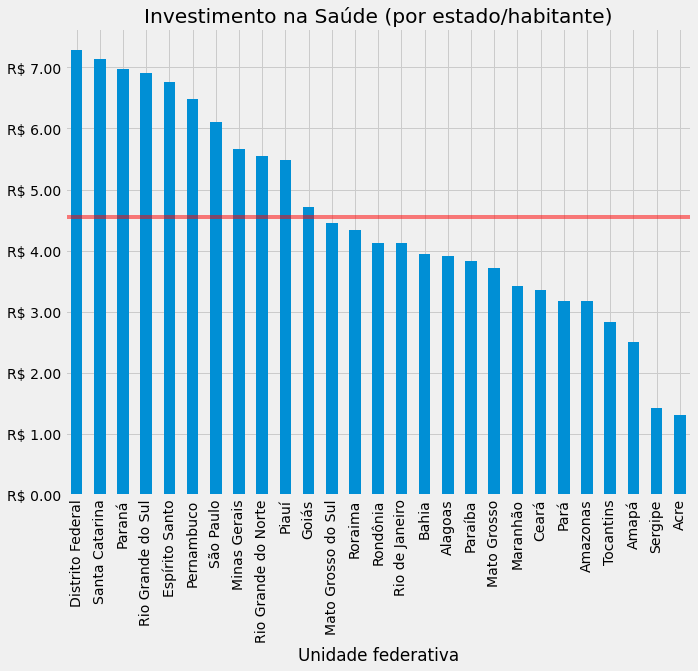

In [59]:
# aqui vamos visualizar nossos dados
ax = gastos_populacao.plot(y='gasto_hab', kind='bar', figsize=(10,8), legend=False)
ax.axhline(gastos_populacao['gasto_hab'].mean(),color='red', alpha=0.5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:.2f}'))
plt.title('Investimento na Saúde (por estado/habitante)');

# Modulo 02

## Aula 01

### StringIO

Usar StringIO pode ser bem útil para quando queremos copiar os dados de fonte externa e colar para um DF do pandas.

O StringIO transforma toda a string como se fosse um arquivo csv.

In [60]:
dados_populacao = """
Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)
"""

In [61]:
dados_populacao = StringIO(dados_populacao)

In [62]:
dados_populacao_wiki = pd.read_csv(dados_populacao, sep='\t', skiprows=1)

In [63]:
dados_populacao_wiki

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
6,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
7,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
8,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
9,9,Pará Pará,8 690 745,"4,1%",Áustria (8 602 112)


In [64]:
dados_populacao_wiki.rename(columns={'Unidade federativa':'UF'}, inplace=True)
dados_populacao_wiki = dados_populacao_wiki[1:]
dados_populacao_wiki.set_index('UF', inplace=True)

In [65]:
dados_populacao_wiki['População'] = dados_populacao_wiki['População'].str.replace(" ", "")

<ipython-input-65-59baf6ec55db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_populacao_wiki['População'] = dados_populacao_wiki['População'].str.replace(" ", "")


In [66]:
# eliminando os espaços extras nos nomes
dados_populacao_wiki.index = dados_populacao_wiki.index.str.strip()

In [67]:
for estado in dados_populacao_wiki.index:
    dados_populacao_wiki.index = dados_populacao_wiki.index.str.replace(f"{estado} {estado}", estado)
#dados_populacao_wiki.index

In [68]:
dados_populacao_wiki.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará Pará',
       'Santa Catarina', 'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo',
       'Paraíba', 'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='UF')

### =-=-=-=-=-Fim da Demonstração de StringIO-=-=-==-=-=-=

In [69]:
gastos_proporcionais = gastos_mais_recentes/gastos_mais_recentes.sum()*100
gastos_proporcionais

São Paulo             25.72
Minas Gerais          10.96
Paraná                 7.31
Rio Grande do Sul      7.18
Rio de Janeiro         6.51
Bahia                  5.36
Pernambuco             5.67
Santa Catarina         4.71
Ceará                  2.80
Goiás                  3.05
Pará                   2.51
Maranhão               2.22
Espírito Santo         2.50
Rio Grande do Norte    1.78
Paraíba                1.41
Distrito Federal       2.02
Mato Grosso do Sul     1.14
Piauí                  1.64
Alagoas                1.19
Mato Grosso            1.19
Amazonas               1.22
Sergipe                0.30
Tocantins              0.41
Rondônia               0.67
Acre                   0.11
Roraima                0.25
Amapá                  0.20
Name: 2020/Jul, dtype: float64

In [70]:
populacao_por_estado

,População
Unidade federativa,
Acre,894470
Alagoas,3351543
Amapá,861773
Amazonas,4207714
Bahia,14930634
Ceará,9187103
Distrito Federal,3055149
Espírito Santo,4064052
Goiás,7113540


In [71]:
gastos_populacao

,2020/Jul,População,gasto_hab
Unidade federativa,,,
Distrito Federal,22233542.26,3055149,7.28
Santa Catarina,51764534.76,7252502,7.14
Paraná,80320852.69,11516840,6.97
Rio Grande do Sul,78929703.81,11422973,6.91
Espírito Santo,27460475.47,4064052,6.76
Pernambuco,62325444.34,9616621,6.48
São Paulo,282709570.31,46289333,6.11
Minas Gerais,120467187.34,21292666,5.66
Rio Grande do Norte,19593057.45,3534165,5.54


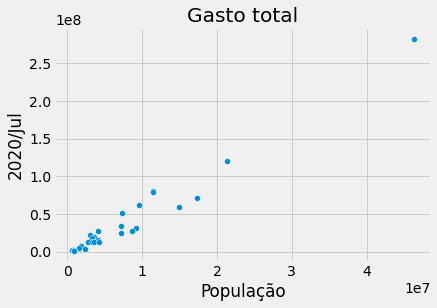

In [72]:
sns.scatterplot(data=gastos_populacao, x='População', y='2020/Jul')
plt.title('Gasto total');

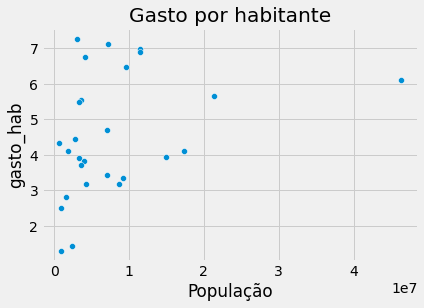

In [73]:
sns.scatterplot(data=gastos_populacao, x='População', y='gasto_hab')
plt.title('Gasto por habitante');

In [74]:
gastos_junho = ordenado_por_total['2020/Jun']

In [75]:
gastos_junho.index = [i[3:] for i in gastos_junho.index]

In [76]:
gastos_populacao['2020/Jun'] = gastos_junho

In [77]:
gastos_junho

São Paulo             299060851.62
Minas Gerais          135977571.87
Paraná                 92901461.36
Rio Grande do Sul      89019478.82
Rio de Janeiro         77604925.21
Bahia                  65159300.63
Pernambuco             68145110.59
Santa Catarina         56503747.99
Ceará                  42146555.81
Goiás                  34437633.20
Pará                   35396030.78
Maranhão               31128144.66
Espírito Santo         27450865.16
Rio Grande do Norte    20219961.81
Paraíba                19666096.87
Distrito Federal       23479773.03
Mato Grosso do Sul     15838659.34
Piauí                  15375523.59
Alagoas                14278872.07
Mato Grosso            14585009.42
Amazonas               17509334.66
Sergipe                 6705923.03
Tocantins               5018138.13
Rondônia                9193593.76
Acre                    2199920.70
Roraima                 3216466.51
Amapá                   2699492.23
Name: 2020/Jun, dtype: float64

In [78]:
gastos_populacao

,2020/Jul,População,gasto_hab,2020/Jun
Unidade federativa,,,,
Distrito Federal,22233542.26,3055149,7.28,23479773.03
Santa Catarina,51764534.76,7252502,7.14,56503747.99
Paraná,80320852.69,11516840,6.97,92901461.36
Rio Grande do Sul,78929703.81,11422973,6.91,89019478.82
Espírito Santo,27460475.47,4064052,6.76,27450865.16
Pernambuco,62325444.34,9616621,6.48,68145110.59
São Paulo,282709570.31,46289333,6.11,299060851.62
Minas Gerais,120467187.34,21292666,5.66,135977571.87
Rio Grande do Norte,19593057.45,3534165,5.54,20219961.81


In [79]:
cols = ['2020/Jun', '2020/Jul', 'População', 'gasto_hab']

In [80]:
gastos_populacao = gastos_populacao[cols]

In [81]:
gastos_populacao

,2020/Jun,2020/Jul,População,gasto_hab
Unidade federativa,,,,
Distrito Federal,23479773.03,22233542.26,3055149,7.28
Santa Catarina,56503747.99,51764534.76,7252502,7.14
Paraná,92901461.36,80320852.69,11516840,6.97
Rio Grande do Sul,89019478.82,78929703.81,11422973,6.91
Espírito Santo,27450865.16,27460475.47,4064052,6.76
Pernambuco,68145110.59,62325444.34,9616621,6.48
São Paulo,299060851.62,282709570.31,46289333,6.11
Minas Gerais,135977571.87,120467187.34,21292666,5.66
Rio Grande do Norte,20219961.81,19593057.45,3534165,5.54


#### Comparando gastos de Junho e Julho entre os estados

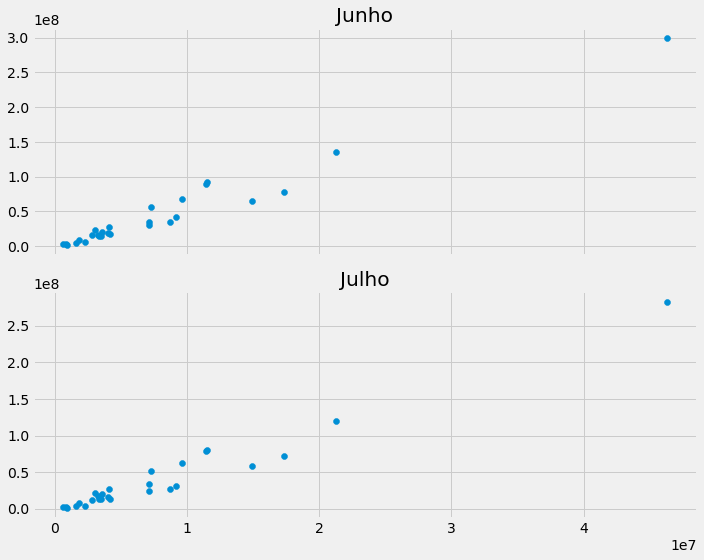

In [82]:
fig, ax = plt.subplots(2, tight_layout=True, figsize=(10,8), sharex=True)

ax[0].scatter(x=gastos_populacao['População'], y=gastos_populacao['2020/Jun'])
ax[0].set_title('Junho')

ax[1].scatter(x=gastos_populacao['População'], y=gastos_populacao['2020/Jul'])
ax[1].set_title('Julho');



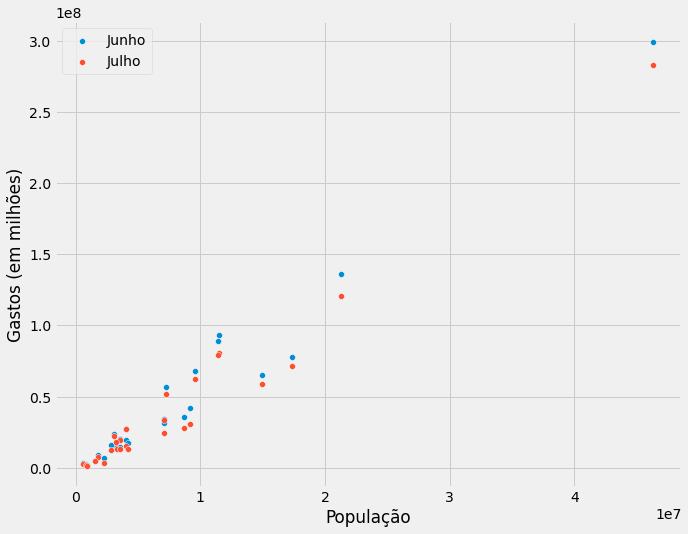

In [83]:
# aqui vamos colocar a dispersão de junho e julho num único gráfico
plt.figure(figsize=(10,8))
sns.scatterplot(data=gastos_populacao, x='População', y='2020/Jun', label='Junho')
sns.scatterplot(data=gastos_populacao, x='População', y='2020/Jul', label='Julho')
plt.ylabel('Gastos (em milhões)')
plt.legend();

In [84]:
# consertando o nome do indice para tirar os numeros que precedem os estados
ordenado_por_total.index = ordenado_por_total.index.str[3:]

In [85]:
# vamos pegar os dados a partir de Fevereiro de 2008, conforme na aula
ordenado_por_total_fev = ordenado_por_total.loc[:,'2008/Fev':]

## Aula 03

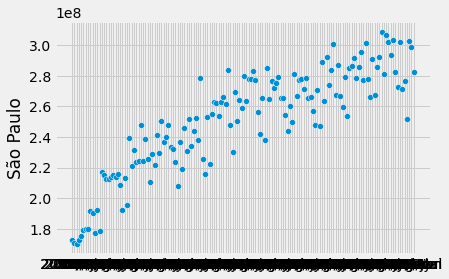

In [86]:
# aqui fazemos uma 'gambiarra' e atribuimos a y uma serie de .loc[]
# quando o correto para isso é passar o nome da coluna para y
sns.scatterplot(x=ordenado_por_total_fev.loc['São Paulo'].index, y=ordenado_por_total_fev.loc['São Paulo']);

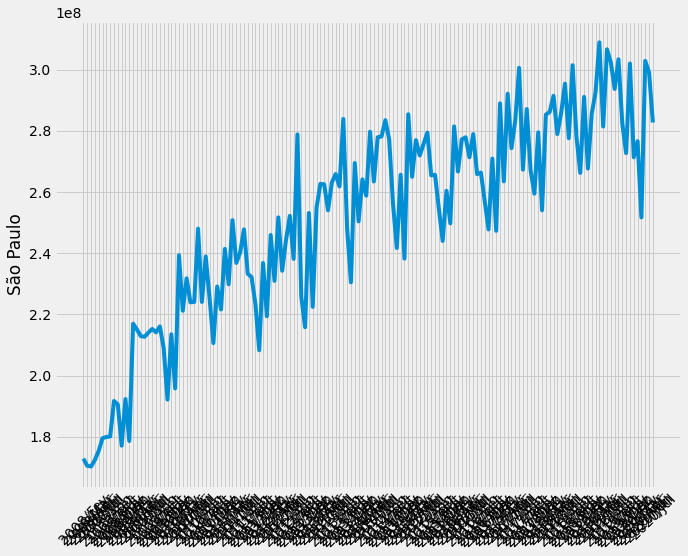

In [87]:
# vamos aqui fazer do jeito correto, ou seja, passando nome da coluna para y
# tambem vamos usar linhas, ja que trata-se de serie temporal
mensal = ordenado_por_total_fev.T # transpondo o dataframe para que os estados fiquem como colunas
plt.figure(figsize=(10,8))
sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
plt.xticks(rotation=45);

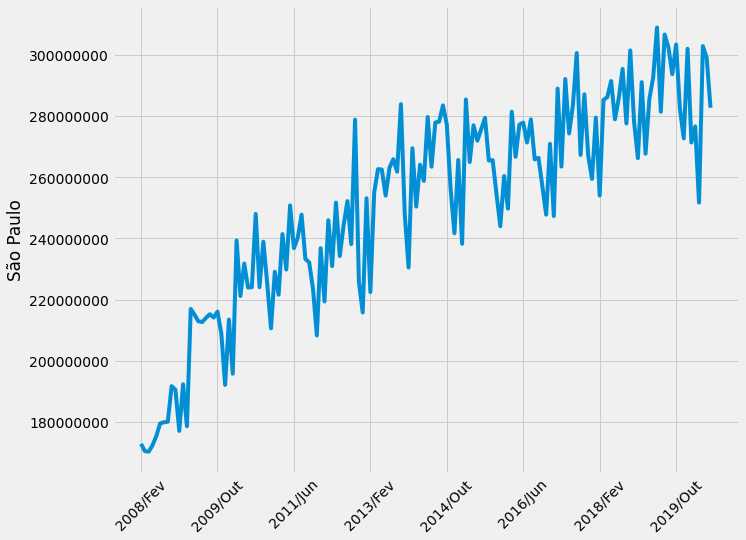

In [88]:
# o grafico acima ainda nao esta bom
# vamos dar uma melhorada formatando os eixos 
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo') # temos que instanciar a um objeto
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}')) # formatando eixo y como objeto
ax.xaxis.set_major_locator(ticker.AutoLocator()) # alterando local e melhorando a legibilidade do eixo x
plt.xticks(rotation=45);

In [89]:
# vamos dividir os valor por 1 milhao para excluirmos os zeros na plotagem
mensal = mensal/1000000

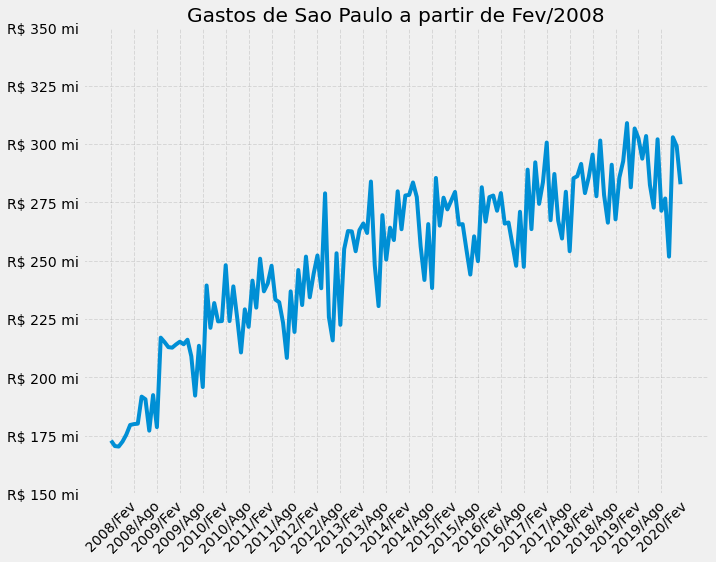

In [90]:
# aqui vamos repetir a mesma plotagem, mas agora formatando ainda mais o eixo x
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo') 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.0f} mi')) 

# usando o indexlocator para customizar ainda mais
# primeiro argumento eh de quanto em quanto e segundo argumento eh quando se inicia
# como o primeiro mes eh fevereiro, o offset como 0 indica que eh de fevereiro que começamos a plotar
ax.xaxis.set_major_locator(ticker.IndexLocator(base=6, offset=0)) 

# tirando o label do eixo y para nao ter poluição visual
ax.set_ylabel('')

# setando os limites do eixo y
plt.ylim([150,350])

# brincando com o método grid
plt.grid(True, which='major', axis='both', ls='--', lw=1, color='black', alpha=0.1)

# alterando rotação dos ticks do eixo x
plt.xticks(rotation=45)

# usando objeto para setar título
ax.set_title('Gastos de Sao Paulo a partir de Fev/2008');

In [91]:
mensal

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,...,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/Mar,276.61,147.08,114.48,84.65,73.59,70.34,59.63,56.71,46.40,34.56,...,15.32,16.00,14.44,14.77,9.19,7.03,7.17,2.86,2.81,2.29
2020/Abr,251.70,126.33,96.73,76.29,68.16,59.11,53.84,51.18,43.47,27.50,...,11.88,14.24,11.94,16.33,8.40,6.20,7.42,2.47,2.30,1.77
2020/Mai,302.86,136.87,106.10,86.08,86.28,61.76,65.42,56.84,54.20,31.87,...,14.18,15.25,13.98,19.44,8.45,6.73,8.58,2.38,2.91,2.70
2020/Jun,299.06,135.98,92.90,89.02,77.60,65.16,68.15,56.50,42.15,34.44,...,15.38,14.28,14.59,17.51,6.71,5.02,9.19,2.20,3.22,2.70


## Aula 04

Para trabalhar com data e hora a principal biblioteca e que vamos trabalhar aqui é a datetime

In [92]:
import datetime

In [93]:
datetime.date.today()

datetime.date(2021, 2, 1)

In [94]:
# vamos transformar o indice do df mensal de strings para formato de data
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,...,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


In [95]:
meses = {
    'Jan':1,
    'Fev':2,
    'Mar':3,
    'Abr':4,
    'Mai':5,
    'Jun':6,
    'Jul':7,
    'Ago':8,
    'Set':9,
    'Out':10,
    'Nov':11,
    'Dez':12
}

def para_dia(ano_mes):
    ano = int(ano_mes[:4])
    mes = ano_mes[5:]
    # vamos usar nosso dicionario para que cada respectivo mes encontro seu valor em forma de numero
    mes_num = int(meses[mes])
    return datetime.date(ano, mes_num, 1)

In [96]:
# alterando nosso indice
mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,...,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


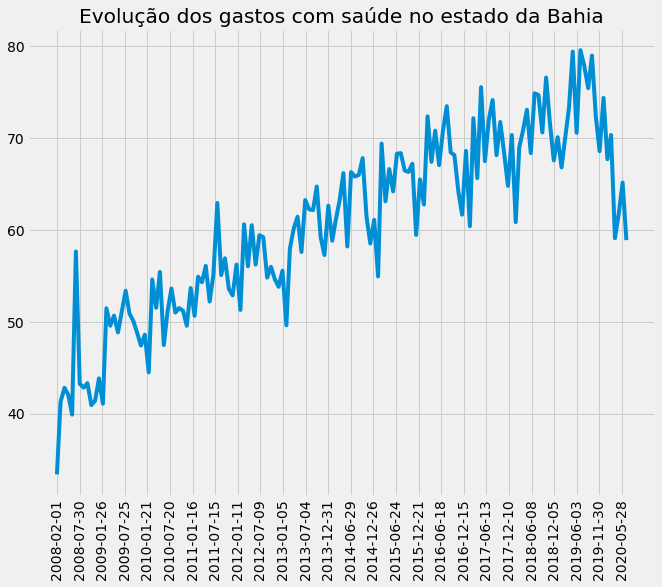

In [97]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=mensal, x=mensal.index, y='Bahia')
plt.title('Evolução dos gastos com saúde no estado da Bahia')
plt.ylabel('')
# aqui neste locator o argumento base refere-se ao numero de dias
ax.xaxis.set_major_locator(ticker.IndexLocator(base=180, offset=0))
plt.xticks(rotation=90);

Manipulação de dados com Melt

Ao usarmos o codigo com seaborn para plotar o grafico de linha acima, vemos que y so aceita um valor. Mas, e se quisermos plotar mais de um estado? Poderiamos copiar e colar o codigo so alterando o argumento de y? Sim, poderiamos fazer. Mas, alem de ficar uma bagunça existe uma maneira mais eficiente e limpa. Vamos dar uma estudada no metodo melt.

In [98]:
# vamos pegar o datafrma abaixo e criar uma coluna para estados, outra para datas e outra para valores
mensal.head(2)

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18


In [99]:
# aqui aplicamos o melt para criar o novo dataframe
mensal_aberto = mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)
mensal_aberto.columns = ['data', 'uf', 'gasto']
mensal_aberto.head()

,data,uf,gasto
0,2008-02-01,São Paulo,172.83
1,2008-03-01,São Paulo,170.48
2,2008-04-01,São Paulo,170.28
3,2008-05-01,São Paulo,172.40
4,2008-06-01,São Paulo,175.42


In [100]:
# se quisermos escolher alguns estados especificos para plotar e fazer comparacao
# basta criar um subset do df com os estados desejados
mensal_aberto_selecionados = mensal_aberto[mensal_aberto['uf'].isin(['Bahia', 'São Paulo', 'Pernambuco', 'Amazonas'])]

In [101]:
paleta = sns.color_palette("tab10")
sns.set_palette(paleta)

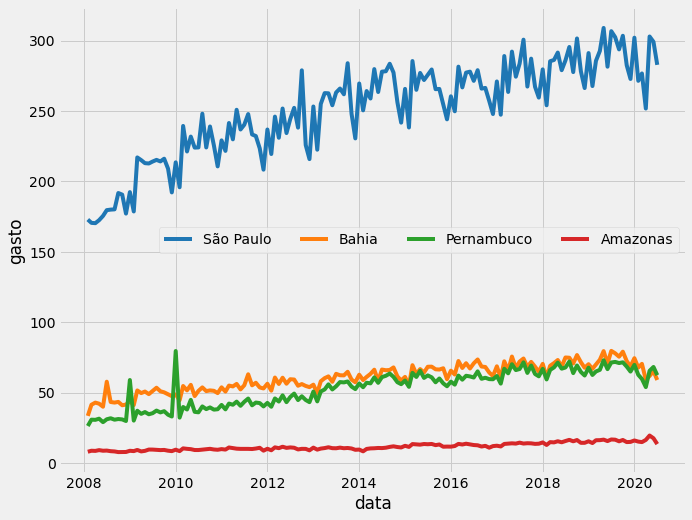

In [102]:
plt.figure(figsize=(10,8))
sns.lineplot(data=mensal_aberto_selecionados, x='data', y='gasto', hue='uf')
plt.legend(ncol=4, loc='best');

In [103]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

### Desafio 01

Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

In [104]:
# primeira ponto interessante que achei foi esse de poder quebrar uma data em varios formatos
d = datetime.date(2020, 12, 1)
print(f"A data {d.strftime('%d')} de {d.strftime('%B')} de {d.strftime('%Y')} caiu numa {d.strftime('%A')}.")
d.strftime('Dia semana: %A, Dia mes: %d, Mes nome: %B, Mes sigla: %b, Mes numero: %m, Ano abr: %y, Ano numero: %Y')

A data 01 de December de 2020 caiu numa Tuesday.


'Dia semana: Tuesday, Dia mes: 01, Mes nome: December, Mes sigla: Dec, Mes numero: 12, Ano abr: 20, Ano numero: 2020'

In [105]:
m = datetime.date(1995, 11, 10)
m.replace(year=1990)

datetime.date(1990, 11, 10)

In [106]:
a = datetime.date.today() - datetime.date(1940, 11, 22)

### Desafio 02

Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

In [107]:
mensal_aberto_para_original = mensal_aberto.pivot(index='data', columns='uf', values='gasto')
mensal_aberto_para_original.index.name = None
mensal_aberto_para_original.columns.name = None
mensal_aberto_para_original.columns = mensal.columns
mensal_aberto_para_original.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,1.74,8.11,1.28,7.93,33.41,27.64,10.22,10.03,18.15,13.45,...,9.71,9.11,45.90,44.12,1.94,0.77,24.41,4.64,172.83,5.05
2008-03-01,2.06,9.21,1.18,8.64,41.30,30.09,11.63,12.26,20.99,14.75,...,10.43,10.13,52.93,42.89,1.96,0.88,27.48,5.02,170.48,5.20
2008-04-01,2.06,10.47,1.40,8.53,42.83,31.38,11.92,12.45,21.05,15.15,...,10.23,10.96,51.97,45.30,2.14,0.90,27.81,5.27,170.28,5.34
2008-05-01,2.23,9.84,1.41,9.08,42.07,31.19,11.90,11.79,19.16,14.54,...,10.56,11.03,51.68,43.95,2.28,1.03,28.35,5.37,172.40,5.34
2008-06-01,2.11,10.29,1.42,8.65,39.91,29.46,11.97,11.89,20.33,14.55,...,10.47,10.45,53.76,44.10,2.62,0.94,28.99,4.98,175.42,5.40


## Aula 05

E se quisermos analisar os gastos por mes? Ou seja, fazemos um acumulado dos respectivos meses de cada ano e plotamos essa variação mês a mês num gráfico. Isto pode ser útil quando queremos ver a variação dos gastos mensais para um único estado. Por exemplo, quero ver o acumulado de gastos mensais para o estado da Bahia. Sera que todo mês de fevereiro tem pico? Para realizar essa tarefa vamos manipular os dados da coluna data, que está como objeto, e transformá-lo para datetime. A partir daí podemos extrair o que quisermos, dia, mês ou ano.
<br>

Vamos aos exemplos abaixo para ficar mais claro.

In [108]:
# veja que o tipo de dado desta serie é objeto
# queremos separar esta data em dias e meses
mensal_aberto['data']

0       2008-02-01
1       2008-03-01
2       2008-04-01
3       2008-05-01
4       2008-06-01
           ...    
4045    2020-03-01
4046    2020-04-01
4047    2020-05-01
4048    2020-06-01
4049    2020-07-01
Name: data, Length: 4050, dtype: object

In [109]:
# para quebrar as datas em meses e anos primeiro temos que transformar o tipo de dados
mensal_aberto['data'] = pd.to_datetime(mensal_aberto['data'])
# outra forma de fazer esta transformação segue abaixo
#mensal_aberto['data'] = mensal_aberto['data'].astype('datetime64')

# aqui vamos criar as novas colunas quebrando a data em mes e dia
mensal_aberto['mes'] = mensal_aberto['data'].dt.month
mensal_aberto['ano'] = mensal_aberto['data'].dt.year
mensal_aberto.head()


,data,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172.83,2,2008
1,2008-03-01,São Paulo,170.48,3,2008
2,2008-04-01,São Paulo,170.28,4,2008
3,2008-05-01,São Paulo,172.40,5,2008
4,2008-06-01,São Paulo,175.42,6,2008


O dataframe esta do jeito que a gente quer, mas ao plotar o grafico abaixo vemos que ele ainda nao esta do jeito que a gente quer. Por que? Foi plotado o gasto com os meses no eixo x e os anos como categorias. Essa bagunça toda que pode ver abaixo aconteceu porque o gráfico plotou todos os ano para cada estado

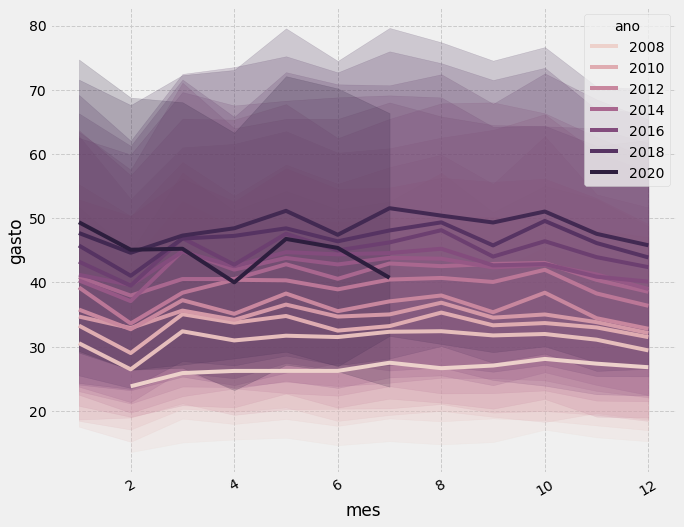

In [110]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=mensal_aberto, x='mes', y='gasto', hue='ano')
plt.xticks(rotation=30)
#plt.ylim(0,350)
plt.grid(ls='--')

Para resolver o problema explicado acima, vamos fazer uma query selecionando somente um estado.

In [111]:
bahia = mensal_aberto.query("uf=='Bahia'")

Agora perceba no grafico abaixo que todos os anos e respectivos meses do periodo são mostrados para o estado da Bahia

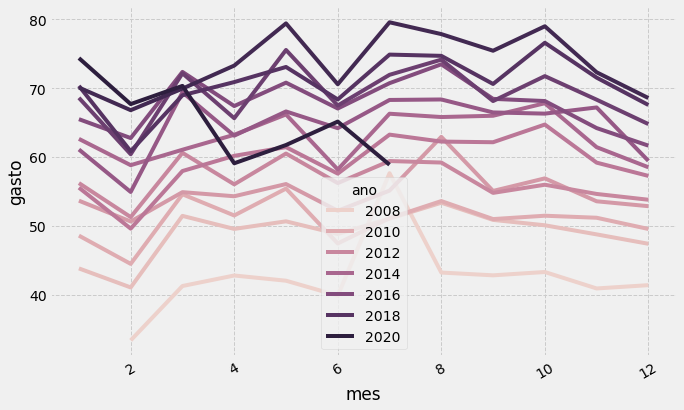

In [112]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=bahia, x='mes', y='gasto', hue='ano')
plt.xticks(rotation=30)
plt.grid(ls='--')

### Desafio 01

Melhorar o gráfico ano a ano:
- Mudar a palete de cor;
- Colocar um título descritivo;
- Adicionar ticks com o nome de cada mês no eixo x;

In [113]:
bahia['mes_nome'] = bahia['data'].dt.strftime('%b')

<ipython-input-113-bac4cc131236>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bahia['mes_nome'] = bahia['data'].dt.strftime('%b')


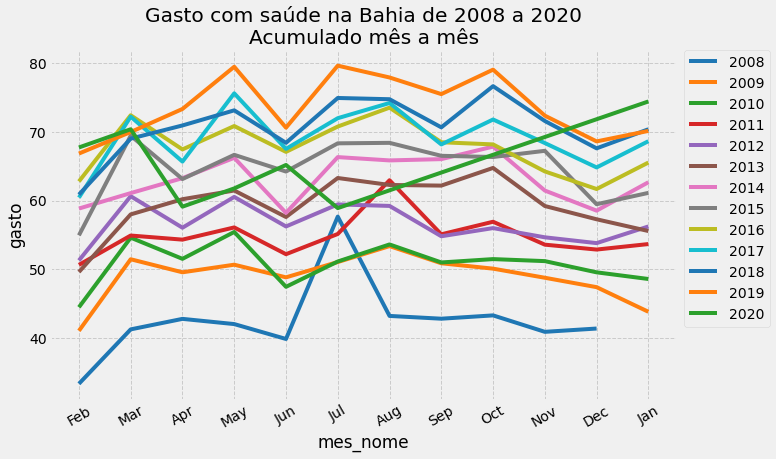

In [114]:
plt.figure(figsize=(10,6))
# veja que na nossa palete de cores, escolhemos o numero de cores que representara cada categoria
# este eh o segundo argumento do metodo color_palette
ax = sns.lineplot(data=bahia, x='mes_nome', y='gasto', hue='ano', palette=sns.color_palette('tab10', 13))
plt.xticks(rotation=30)
plt.title('Gasto com saúde na Bahia de 2008 a 2020\nAcumulado mês a mês')
plt.legend(bbox_to_anchor=(1,1.02))
plt.grid(ls='--')

Vamos criar uma coluna que informa o gasto por dia de cada mes

In [115]:
# para isso, vamos criar um dicionario com os dias por mes

dias_por_mes = {
    1:31,
    2:28,
    3:31,
    4:30,
    5:31,
    6:30,
    7:31,
    8:31,
    9:30,
    10:31,
    11:30,
    12:31
}

In [116]:
mensal_aberto['mes'].map(dias_por_mes)

0       28
1       31
2       30
3       31
4       30
        ..
4045    31
4046    30
4047    31
4048    30
4049    31
Name: mes, Length: 4050, dtype: int64

In [117]:
# criand a coluna com gasto diarios
mensal_aberto['gasto_diario'] = mensal_aberto['gasto']/mensal_aberto['mes'].map(dias_por_mes)
mensal_aberto

,data,uf,gasto,mes,ano,gasto_diario
0,2008-02-01,São Paulo,172.83,2,2008,6.17
1,2008-03-01,São Paulo,170.48,3,2008,5.50
2,2008-04-01,São Paulo,170.28,4,2008,5.68
3,2008-05-01,São Paulo,172.40,5,2008,5.56
4,2008-06-01,São Paulo,175.42,6,2008,5.85
...,...,...,...,...,...,...
4045,2020-03-01,Amapá,2.29,3,2020,0.07
4046,2020-04-01,Amapá,1.77,4,2020,0.06
4047,2020-05-01,Amapá,2.70,5,2020,0.09
4048,2020-06-01,Amapá,2.70,6,2020,0.09


### Desafio 02

Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.

In [118]:
amazonas = mensal_aberto.query("uf=='Amazonas'")
amazonas['mes_nome'] = amazonas['data'].dt.strftime('%b')

<ipython-input-118-cfceb6e0ed45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazonas['mes_nome'] = amazonas['data'].dt.strftime('%b')


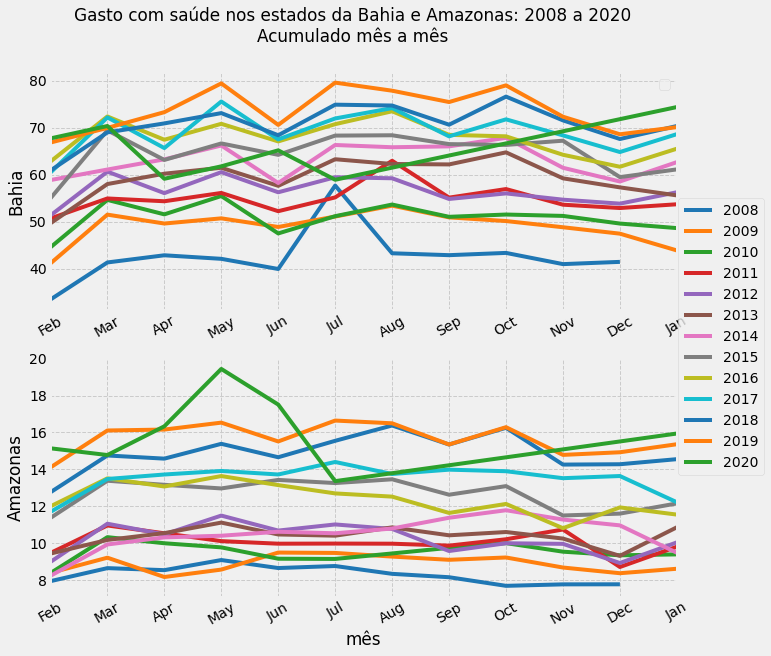

In [119]:
plt.figure(figsize=(10,9))
plt.subplot(2, 1, 1)
sns.lineplot(data=bahia, x='mes_nome', y='gasto', hue='ano', palette=sns.color_palette('tab10', 13))
plt.xticks(rotation=30)
plt.legend('')
plt.xlabel('')
plt.xlim('Feb', 'Jan')
plt.ylabel('Bahia')
plt.grid(ls='--')

plt.subplot(2, 1, 2)
sns.lineplot(data=amazonas, x='mes_nome', y='gasto', hue='ano', palette=sns.color_palette('tab10', 13))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=[1.15, 1.7])
plt.xlabel('mês')
plt.ylabel('Amazonas')
plt.xlim('Feb', 'Jan')
plt.grid(ls='--')

plt.suptitle('Gasto com saúde nos estados da Bahia e Amazonas: 2008 a 2020\nAcumulado mês a mês');

plt.savefig('comparativo.png', dpi=200)

## Aula 06

Trabalhando com groupby. Se quisermos agrupar por ano e fazer um somatorio de cada agrupamento?

In [120]:
gastos_por_ano = mensal_aberto.groupby('ano').sum()
gastos_por_ano.head()

,gasto,mes,gasto_diario
ano,,,
2008,7876.37,2079,259.40
2009,10054.43,2106,330.44
2010,10751.55,2106,353.38
2011,11227.33,2106,369.22
2012,11624.16,2106,382.10


In [121]:
hue_order = gastos_por_ano.reset_index().sort_values('gasto', ascending=True)['ano']
hue_order.index = range(len(hue_order.index))
hue_order

0     2008
1     2020
2     2009
3     2010
4     2011
5     2012
6     2013
7     2014
8     2015
9     2016
10    2017
11    2018
12    2019
Name: ano, dtype: int64

<AxesSubplot:xlabel='ano', ylabel='gasto'>

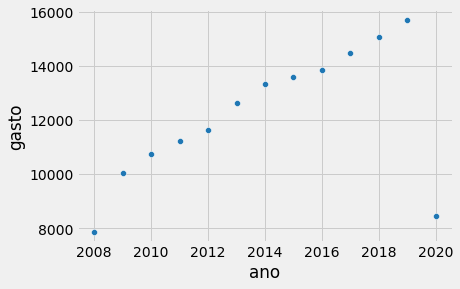

In [122]:
# plotando em sccaterplot
# o ano de 2020 nao esta com os dados completos, portanto teve essa representação mais baixa
sns.scatterplot(data=gastos_por_ano, x=gastos_por_ano.index, y='gasto')

<AxesSubplot:xlabel='ano', ylabel='gasto'>

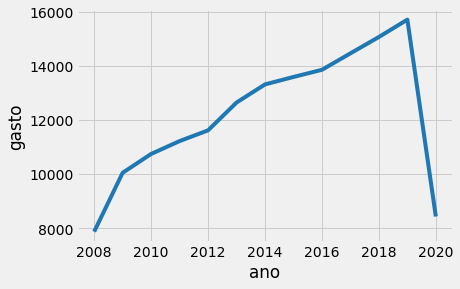

In [123]:
sns.lineplot(data=gastos_por_ano, x=gastos_por_ano.index, y='gasto')

In [124]:
# vamos fazer alguns modelos diferentes de plotagem por estado
estados = ['São Paulo', 'Minas Gerais', 'Pernambuco']
# vamos agrupar esses 3 estados e resetar o indice (para transformar os indices em colunas)
por_ano_dos_estados = mensal_aberto.query("uf in @estados").groupby(['uf', 'ano']).sum().reset_index()

<AxesSubplot:xlabel='ano', ylabel='gasto'>

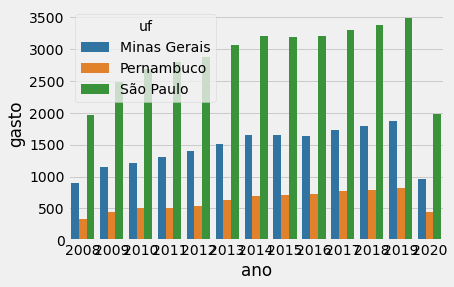

In [125]:
# podemos visualizar os gastos por estado e por ano num unico grafico de barras
sns.barplot(data=por_ano_dos_estados, x='ano', y='gasto', hue='uf')

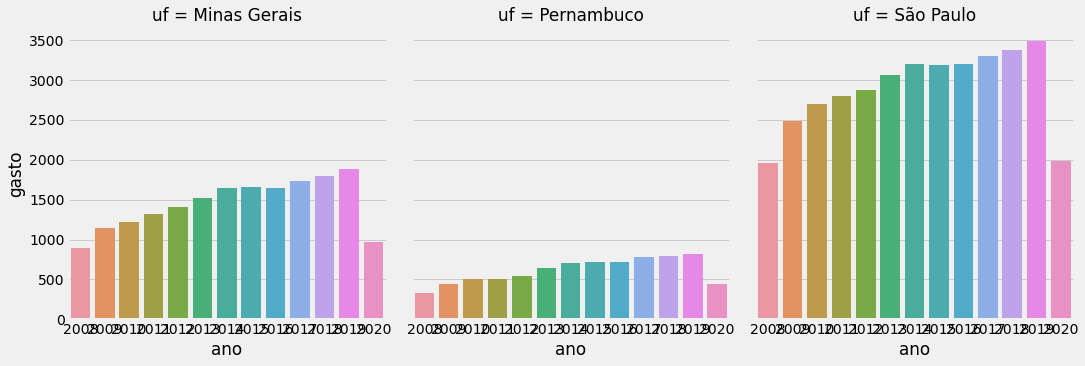

In [126]:
# se quisermos analisar individualmente cada categoria tambem e possível
# com seaborn tambem podemos plotar como se fossem subplots do matplotlib
# neste caso, cada categoria seria uma coluna
# vamos usar o catplot para isso
# com catplot podemos chamar varios tipos de gráficos, inclusive barra como no barplot
sns.catplot(data=por_ano_dos_estados, x='ano', y='gasto', kind='bar', col='uf');

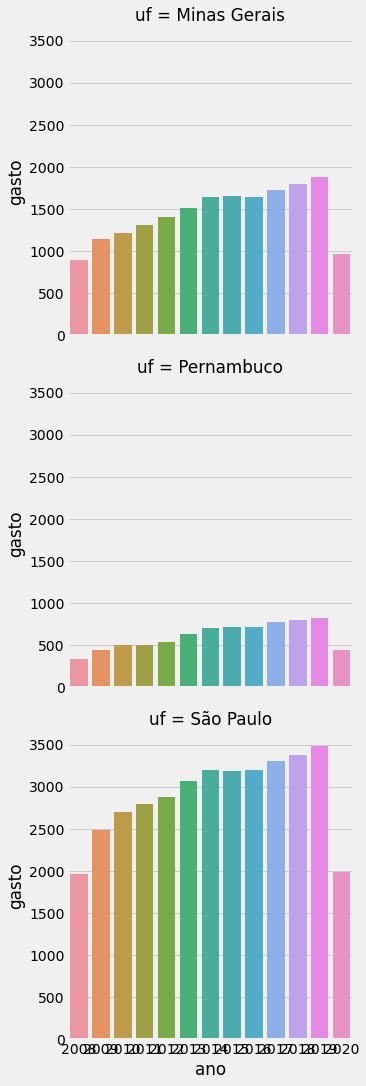

In [127]:
# ou podemos organizar as categorias em linhas tambem
sns.catplot(x='ano', y='gasto', data=por_ano_dos_estados, kind='bar', row='uf');

<AxesSubplot:xlabel='ano', ylabel='gasto'>

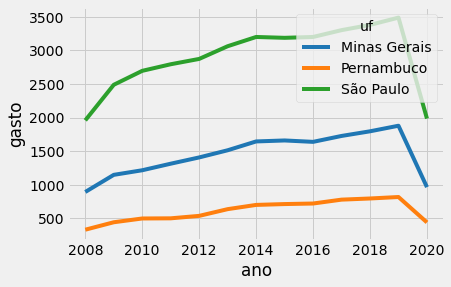

In [128]:
# acima vimos a funcionalidade do catplot
# mas para melhor comparar o desempenho de cada categoria o melhor seria plotar em linhas, conforme abaixo
sns.lineplot(data=por_ano_dos_estados, x='ano', y='gasto', hue='uf')

### Desafio 1

Colocar as cores das barras associadas ao eixo y ('gastos')

In [129]:
# primeiro vamos pegar a sequencia de anos ordenada de acordo com o respectivo gasto
hue_order = gastos_por_ano.reset_index().sort_values('gasto', ascending=True)['ano']
# vamos organizar para que o indice fique em ordem normal
hue_order.index = range(len(hue_order.index))
hue_order

0     2008
1     2020
2     2009
3     2010
4     2011
5     2012
6     2013
7     2014
8     2015
9     2016
10    2017
11    2018
12    2019
Name: ano, dtype: int64

<AxesSubplot:xlabel='ano', ylabel='gasto'>

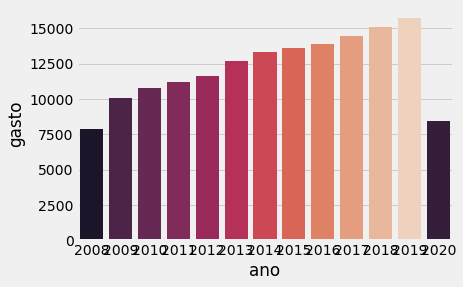

In [130]:
# selecionando palete de cores com numero de tons igual ao tamanho da serie hue_order
palette = sns.color_palette('rocket', len(hue_order))
# colocando num dicionario cada ano como chave e suas respectivas cores como valores
palette_hue_ordered = dict(zip(hue_order, palette))
# agora basta plotar normalmente
sns.barplot(x=gastos_por_ano.index, y='gasto', data=gastos_por_ano, palette=palette_hue_ordered)

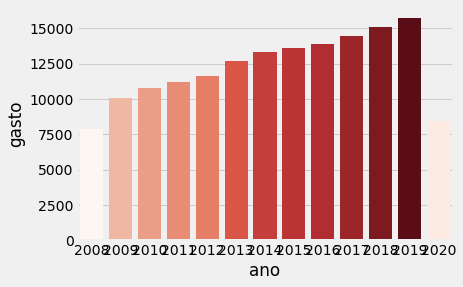

In [131]:
# tambem existe essa solucao abaixo usando o modelu matplotlib
# o metodo to_rgba faz a associação das cores por cada espectro de gasto
import matplotlib as mpl

sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y='gasto', 
            palette=mpl.cm.ScalarMappable(cmap='Reds').to_rgba(gastos_por_ano['gasto']));

# Modulo 03

## Aula 01

#### Analise pense2015
Neste modeulo faremos uma analise da pesquisa PENSE, realizada pelo IBGE. Este estudo tem como alvo alunos do 9 ano ate o ensino medio e traz informações sobre as realidades socioeconomicas dos estudantes e suas famílias.

In [132]:
# como estamos trabalhando com um arquivo zip, vamos importar a lib zipfile
from zipfile import ZipFile

In [133]:
# instanciando o nosso arquivo
zip = ZipFile('PeNSE_2015_AMOSTRA2.zip')

In [134]:
# usando o metodo infolist para listar todos os arquivos do documento zip
zip.namelist()

['arquivos csv/',
 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

In [135]:
# da lista acima vamos pegar o segundo arquivo e atribuir a uma variável bem descritiva
caminho_arquivo_zipado = zip.namelist()[1]
# agora usamos o método open e passamos o 'endereço' para abrir o arquivo
dados = pd.read_csv(zip.open(caminho_arquivo_zipado), sep=';', thousands='.', decimal=',')
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,299.74,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,355.17,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,299.74,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,355.17,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,299.74,1,2,4,1,5,1,296


In [136]:
# quantas linhas temos na nossa base
dados.shape

(16556, 181)

In [137]:
dados.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

In [138]:
# conhecendo nossos tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


#### Tipos de variáveis:
Valores quantitativos:
- Contínuo
    - Geralmente representado por números do tipo float
    - Altura; peso
- Discreto
    - Geralmente representado por números inteiros
    - Idade; temperatura
            
Valores qualitativos:
- Ainda que reprsentado por números, não tem função matemática
    - Tipos
        - Ordinal
            - para estabelecer uma ordem
            - hierarquia
        - Nominal
            - A ordem das variáveis não fazem diferença

In [139]:
# checando quais colunas sao do tipo float
dados.select_dtypes(include="float")

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.00,15.00,0.00,15.00,60.00,371.00,1570.00,37.10,157.00,299.74
1,120.00,510.00,260.00,130.00,300.00,502.00,1520.00,50.20,152.00,355.17
2,0.00,585.00,130.00,455.00,420.00,482.00,1614.00,48.20,161.40,299.74
3,0.00,0.00,0.00,0.00,0.00,694.00,1725.00,69.40,172.50,355.17
4,30.00,165.00,90.00,45.00,60.00,789.00,1675.00,78.90,167.50,299.74
...,...,...,...,...,...,...,...,...,...,...
16551,30.00,400.00,110.00,260.00,240.00,567.00,1679.00,56.70,167.90,447.82
16552,20.00,800.00,325.00,455.00,240.00,619.00,1858.00,61.90,185.80,592.51
16553,0.00,0.00,0.00,0.00,60.00,609.00,1594.00,60.90,159.40,401.13
16554,75.00,215.00,35.00,105.00,120.00,473.00,1578.00,47.30,157.80,442.72


#### Desafio 03: Classificar algumas perguntas como qualitativa x quantitativa

In [140]:
# vamos pegar 5 colunas aleatorias e classificá-las de acordo
dados.sample(5, axis=1)

,VB02019A,VB08013,VB04003,VB01018,VB01025
0,1,-1,-1,2,5
1,5,-1,-1,2,5
2,5,-1,-1,2,5
3,1,-1,-1,2,6
4,1,-1,-1,2,6
...,...,...,...,...,...
16551,1,-1,-1,1,6
16552,4,-1,-1,1,5
16553,5,-1,-1,2,5
16554,5,-1,-1,1,5


- turma
    - qualitativo nominal (categórica)
    
- vb09015
    - qualitativo nominal
    
- vb04010
    - qualitativo nominal

- vb01011
    - qualitativa nominal
    
- vb12003
    - qualitativa nominal (se considerar pelas alternativas)
    - quantitativa discreta (se considerar pela resposta = 1 amigo, 2 amigos, 3 amigos etc...)
    

## Aula 02
Aqui vamos começar a analisar nossos dados, examinando cada questionamento.

In [141]:
# vamos começar analisando o sexo dos entrevistados
# vejamos a proporção de masculino x feminino --> 1 = masculino | 2 = feminino
dados['VB01001'].value_counts(normalize=True)*100

1   50.05
2   49.95
Name: VB01001, dtype: float64

In [142]:
# como vc se sente em relação ao seu corpo
# vamos fazer um dicionario para mapear as respostas
respostas = {1:'Muito Satisfeito', 2:'Satisfeito', 3:'Pouco Importante', 4:'Sem Importancia', 
             5:'Muito Insatisfeito', 99:'Nao Informado'}

# tirando o percentual de respostas
percentual = dados['VB11007'].value_counts(normalize=True)*100
percentual.index = percentual.index.map(respostas)
percentual

Satisfeito           41.80
Muito Satisfeito     27.83
Sem Importancia      14.05
Pouco Importante     10.91
Muito Insatisfeito    4.31
Nao Informado         1.09
Name: VB11007, dtype: float64

In [143]:
# tirando a frequencia de respostas
frequencia = dados['VB11007'].value_counts()
frequencia.index = frequencia.index.map(respostas)
frequencia

Satisfeito            6920
Muito Satisfeito      4608
Sem Importancia       2326
Pouco Importante      1807
Muito Insatisfeito     714
Nao Informado          181
Name: VB11007, dtype: int64

In [144]:
dist_freq = pd.DataFrame({'Frequencia':frequencia, 'Percentual':percentual})
dist_freq

,Frequencia,Percentual
Satisfeito,6920,41.80
Muito Satisfeito,4608,27.83
Sem Importancia,2326,14.05
Pouco Importante,1807,10.91
Muito Insatisfeito,714,4.31
Nao Informado,181,1.09


#### Desafio 04: Criar uma função para gerar as tabelas de frequencias e fazer a análise de outras infromações.

In [145]:
# criando uma nova coluna de IMC
# a formula do IMC é peso/altura ao quadrado
dados['IMC'] = dados['VB17003']/(dados['VB17004']**2)
dados['IMC']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
16551   0.00
16552   0.00
16553   0.00
16554   0.00
16555   0.00
Name: IMC, Length: 16556, dtype: float64

In [146]:
# vamos aumentar o número de casas decimais para mostrar os valores da divisão
pd.options.display.float_format = '{:.6f}'.format

In [147]:
dados['IMC']

0       0.001505
1       0.002173
2       0.001850
3       0.002332
4       0.002812
          ...   
16551   0.002011
16552   0.001793
16553   0.002397
16554   0.001900
16555   0.002330
Name: IMC, Length: 16556, dtype: float64

In [148]:
# o calculo do IMC é feito com a altura em metros e não em centímetros
# portanto, vamos dividir a altura por 100
dados['IMC'] = dados['VB17003']/((dados['VB17004']/100)**2)
dados['IMC']

0       15.051321
1       21.727839
2       18.502907
3       23.322831
4       28.122076
           ...   
16551   20.113223
16552   17.930782
16553   23.968489
16554   18.995343
16555   23.303246
Name: IMC, Length: 16556, dtype: float64

In [149]:
# vamos criar uma série de categorias de acordo com a classificação do IMC
classes = [0, 18.5, 25, 30, 60]
labels = ['abaixo', 'normal', 'sobrepeso', 'obesidade']

In [150]:
# o pd.cut vai aceitar os argumentos para criar as categorias baseadas na coluna de IMC
# vamos criar uma nova coluna listando essas categorias
dados['classe_IMC'] = pd.cut(x=dados['IMC'], bins=classes, labels=labels, include_lowest=True)
dados['classe_IMC']

0           abaixo
1           normal
2           normal
3           normal
4        sobrepeso
           ...    
16551       normal
16552       abaixo
16553       normal
16554       normal
16555       normal
Name: classe_IMC, Length: 16556, dtype: category
Categories (4, object): ['abaixo' < 'normal' < 'sobrepeso' < 'obesidade']

>Resumindo de alguns argumentos do pd.cut():
>- bins = o numero de categorias que serão classificadas
>- labels = o nome de cada uma dessa categoria
>- include_lowest = para incluir os menores valores na nomeação a partir das lebels

In [151]:
# listando as duas colunas lado a lado
dados[['IMC', 'classe_IMC']]

,IMC,classe_IMC
0,15.051321,abaixo
1,21.727839,normal
2,18.502907,normal
3,23.322831,normal
4,28.122076,sobrepeso
...,...,...
16551,20.113223,normal
16552,17.930782,abaixo
16553,23.968489,normal
16554,18.995343,normal


In [152]:
# aqui vamos criar um dataframe informando a frequencia e percentual de acordo com a classificação do IMC
frequencia_imc = dados['classe_IMC'].value_counts()
percentual_imc = dados['classe_IMC'].value_counts(normalize=True)*100
dist_freq_imc = pd.DataFrame({'frequencia':frequencia_imc, 'percentual':percentual_imc})
dist_freq_imc

,frequencia,percentual
normal,9188,55.496497
abaixo,4975,30.049529
sobrepeso,1760,10.630587
obesidade,633,3.823387


>**Mais esclarecimentos sobre o pd.cut() - Regra de Sturges**
<br>
> E se a gente não souber o números de classes do nosso conjunto de dados? No caso do IMC, o que nos ajudou foi a classificação já estabelecida na literatura médica. Ou seja, entre 0 e 18 é abaixo do peso, entre 18 e 25 é normal, acima de 30 é acima do peso e etc. 
<br>

>Mas e quando não sabemos em que classe jogar nossos números? Por exemplo, os dados de altura. Em quais faixas separar nossos dados? Quantas classes e devo ter entre a altura mínima e máxima? Existe uma fórmula na estatística que nos ajuda a resolver este problema. O número de classes deve ser proporcional ao tamanho da amostra. A fórmula para nos auxiliar é a seguinte:
<br>

>k = 1 + 10/3*log10(tamanho_da_amostra)

In [153]:
# vamos estabelecer o numero de classes para a amostra de altura dos alunos
# aplicaremos a função acima à nossa amostra
# colocaremos como número inteiro (int) para retornar valor redondo
tamanho_amostra = len(dados)
k = int((1 + ((10/3)*np.log10(tamanho_amostra))))
k

15

In [154]:
# agora vamos utilizar o pd.cut para criar as categorias
# note que não aplicaremos labels, portanto o nome das categorias será a faixa de abrangência
# se colocássemos o labels, seriam necessárias a mesma quantidade de nomes da classe (15)
dados['classe_altura'] = pd.cut(x=dados['VB17004'], bins=k, include_lowest=True)
dados['classe_altura']

0         (152.58, 157.327]
1         (147.833, 152.58]
2        (157.327, 162.073]
3        (171.567, 176.313]
4         (166.82, 171.567]
                ...        
16551     (166.82, 171.567]
16552     (181.06, 185.807]
16553    (157.327, 162.073]
16554    (157.327, 162.073]
16555     (162.073, 166.82]
Name: classe_altura, Length: 16556, dtype: category
Categories (15, interval[float64]): [(124.02799999999999, 128.847] < (128.847, 133.593] < (133.593, 138.34] < (138.34, 143.087] ... (176.313, 181.06] < (181.06, 185.807] < (185.807, 190.553] < (190.553, 195.3]]

In [155]:
frequencia = dados['classe_altura'].value_counts()
percentual = dados['classe_altura'].value_counts(normalize=True)*100
dist_freq = pd.DataFrame({'Frequencia':frequencia, 'Percentual':percentual})
dist_freq

,Frequencia,Percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


#### Desafio 05: Criar uma tabela de frequencia para o peso

In [156]:
tamanho_amostra_peso = len(dados['VB17003'])
k = int((1 + ((10/3)*np.log10(tamanho_amostra_peso))))
k

15

In [157]:
dados['classe_peso'] = pd.cut(x=dados['VB17003'], bins=k, include_lowest=True)
frequencia = dados['classe_peso'].value_counts()
percentual = dados['classe_peso'].value_counts(normalize=True)*100
dist_freq_peso = pd.DataFrame({'Frequencia':frequencia, 'Percentual':percentual})
dist_freq_peso

,Frequencia,Percentual
"(46.32, 57.7]",5754,34.754772
"(34.94, 46.32]",3852,23.266489
"(57.7, 69.08]",3724,22.493356
"(69.08, 80.46]",1425,8.607151
"(23.56, 34.94]",927,5.599179
"(80.46, 91.84]",544,3.285818
"(91.84, 103.22]",202,1.220101
"(103.22, 114.6]",77,0.465088
"(114.6, 125.98]",20,0.120802
"(125.98, 137.36]",15,0.090602


>**Fim do Desafio**

**Crosstab**
<br>
O crosstab funciona para montarmos uma tabela a partir do cruzamento de dados provenientes de outra tabela.

In [158]:
# por exemplo, em relação a pesquisa de satisfação com o corpo, queremos saber a divisão por sexo
frequencia_cruzada = pd.crosstab(dados['VB11007'], dados['VB01001'])

# alterando o indice e colunas para que fiquem descritivos
frequencia_cruzada.rename(index=respostas, inplace=True)
frequencia_cruzada.rename(columns={1:'Masculino', 2:'Feminino'}, inplace=True)

# visualizando nossa tabela
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito Satisfeito,2682,1926
Satisfeito,3490,3430
Pouco Importante,950,857
Sem Importancia,786,1540
Muito Insatisfeito,260,454
Nao Informado,119,62


In [159]:
# podemos tambem aplicar o argumento normalize para retornar a pocentagem
frequencia_cruzada_pct = pd.crosstab(dados['VB11007'], dados['VB01001'], normalize=True)

# alterando o indice e colunas para que fiquem descritivos
frequencia_cruzada_pct.rename(index=respostas, inplace=True)
frequencia_cruzada_pct.rename(columns={1:'Masculino', 2:'Feminino'}, inplace=True)

frequencia_cruzada_pct*100

VB01001,Masculino,Feminino
VB11007,,
Muito Satisfeito,16.199565,11.633245
Satisfeito,21.079971,20.717565
Pouco Importante,5.738101,5.176371
Sem Importancia,4.747524,9.301764
Muito Insatisfeito,1.570428,2.742208
Nao Informado,0.718773,0.374487


>Veja que a função normalize acima traz a porcentagem global, ou seja, do total de alunos 16% est]ao muito satisfeitos e eles são homens

In [160]:
# podemos tambem aplicar o argumento normalize para retornar a pocentagem
frequencia_cruzada_pct = pd.crosstab(dados['VB11007'], dados['VB01001'], normalize="columns")

# alterando o indice e colunas para que fiquem descritivos
frequencia_cruzada_pct.rename(index=respostas, inplace=True)
frequencia_cruzada_pct.rename(columns={1:'Masculino', 2:'Feminino'}, inplace=True)

frequencia_cruzada_pct*100

VB01001,Masculino,Feminino
VB11007,,
Muito Satisfeito,32.363944,23.291813
Satisfeito,42.114155,41.480227
Pouco Importante,11.463738,10.364010
Sem Importancia,9.484735,18.623776
Muito Insatisfeito,3.137444,5.490386
Nao Informado,1.435984,0.749788


>Já passando o argumento 'columns' para normalize, ele calcula a porcentagem por colunas. Ou seja, do total de homens, 32% estão muito satisfeitos

In [161]:
# podemos tambem aplicar o argumento normalize para retornar a pocentagem
frequencia_cruzada_pct = pd.crosstab(dados['VB11007'], dados['VB01001'], normalize="index")

# alterando o indice e colunas para que fiquem descritivos
frequencia_cruzada_pct.rename(index=respostas, inplace=True)
frequencia_cruzada_pct.rename(columns={1:'Masculino', 2:'Feminino'}, inplace=True)

frequencia_cruzada_pct*100

VB01001,Masculino,Feminino
VB11007,,
Muito Satisfeito,58.203125,41.796875
Satisfeito,50.433526,49.566474
Pouco Importante,52.573326,47.426674
Sem Importancia,33.791917,66.208083
Muito Insatisfeito,36.414566,63.585434
Nao Informado,65.745856,34.254144


>Agora passando o argumento 'index', vemos que a pocentagem retornada é das linhas. Ou seja, do total de alunos muito satisfeitos cerca de 58% são do sexo masculino

#### Desafio 06: Criar outros crosstab para analisar e pesquisar sobre o parâmetro aggfunc e testar.

In [162]:
# vamos relembrar quais são nossas colunas
dados.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'V0007', 'V0008', 'V0041', 'aluno', 'escola', 'turma', 'IMC',
       'classe_IMC', 'classe_altura', 'classe_peso'],
      dtype='object', length=185)

In [163]:
# vamos criar nosso df com o crosstab e atribuir à variável cross
# faremos uma contagem de etnia por sexo
cross = pd.crosstab(index=dados['VB01001'], columns=dados['VB01002'])

# alterando nomes das colunas
cross.columns = ['branco', 'preto', 'amarelo', 'pardo', 'indígena', 'na']

#criando dicionario para alterar índice
novo_indice = {1:'masculino', 2:'feminino'}
# atribuindo novos valores ao índice
cross.index = cross.index.map(novo_indice)

# novo nome para o índice
cross.index = cross.index.rename('sexo')
cross

,branco,preto,amarelo,pardo,indígena,na
sexo,,,,,,
masculino,3426,1105,302,3135,307,12
feminino,3149,834,410,3591,274,11


### Aula 04

**Usando histogramas**

<AxesSubplot:xlabel='VB17004', ylabel='Count'>

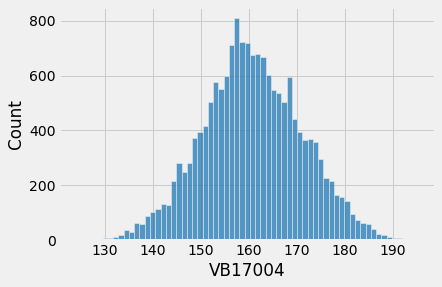

In [164]:
# usaremos o seaborn para visualizar o histograma
# vamos visualizar a distribuição da altura dos nossos alunos
ax = sns.histplot(dados['VB17004'])
ax

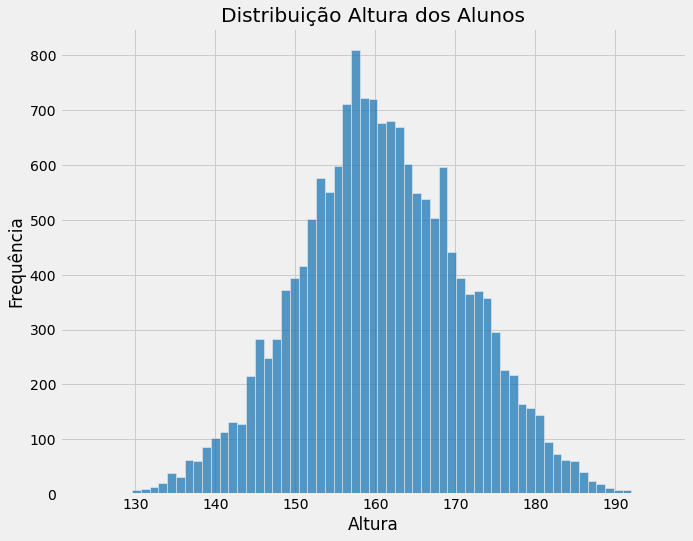

In [165]:
# vamos criar o mesmo histograma, mas passando os argumentos de coluna e dados separados
plt.figure(figsize=(10,8))
ax = sns.histplot(x='VB17004', data=dados)
ax.set_title('Distribuição Altura dos Alunos')
ax.set_xlabel("Altura")
ax.set_ylabel('Frequência')
ax;

#### Desafio 07: Calcular o desvio padrão, média, moda, mediana, e plotar no gráfico

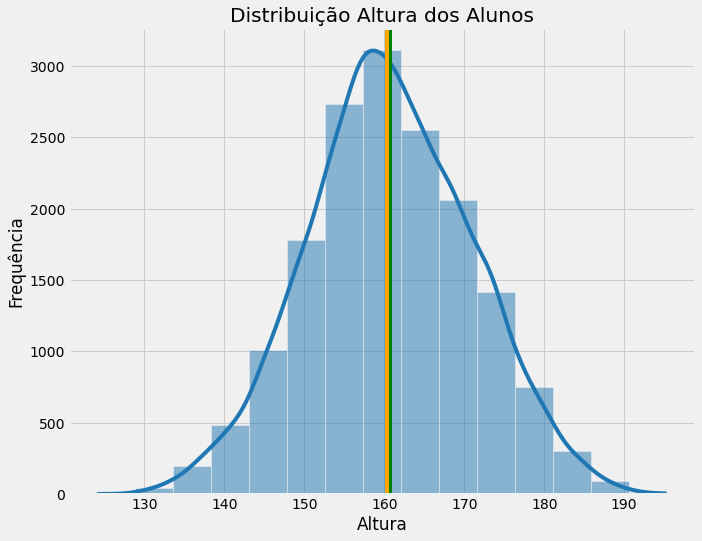

In [166]:
# criando nossa figura
plt.figure(figsize=(10,8))

# plotando nossos dados por oo
ax = sns.histplot(x='VB17004', data=dados, alpha=0.5, bins=15, kde=True)
ax.axvline(dados['VB17004'].mean(), color='green')
ax.axvline(dados['VB17004'].median(), color='orange')
#ax.axvline(dados['VB17004'].mode(), color='black')


# editando nosso gráfico
ax.set_title('Distribuição Altura dos Alunos')
ax.set_xlabel("Altura")
ax.set_ylabel('Frequência')
ax;

>Veja que trata-se de uma distribuição normal, pois temos a média e mediana muito próximas.

**Usando histograma para fazer comparações**
<br>

Podemos plotar mais de uma variável no histograma. O parâmetro _hue_ nos auxilia nesta demanda.
<br>

Vamos copiar o código do histograma acima e acrescentaremos o parâmetro hue.
<br>

Vamos fazer uma comparação da altura dos alunos distribuídos por sexo. A legenda nos informa que a cor rosa claro representa o sexo masculino e a cor mais escura o sexo feminino.

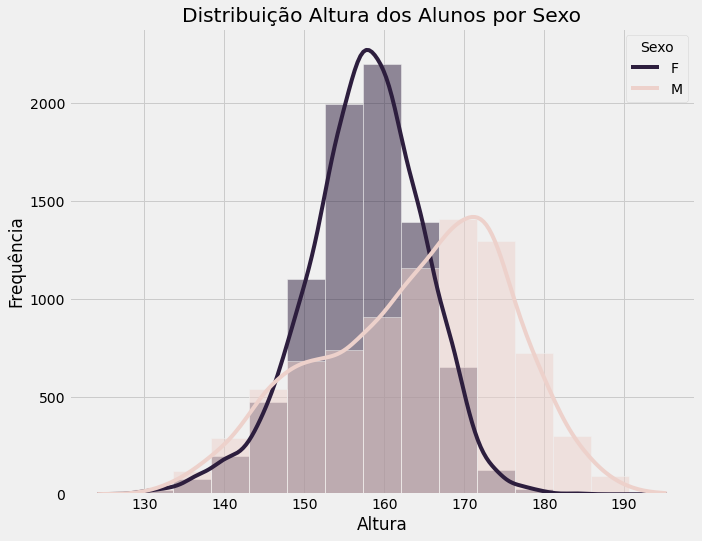

In [167]:
# criando nossa figura
plt.figure(figsize=(10,8))

# plotando nossos dados por oo
ax = sns.histplot(x='VB17004', data=dados, alpha=0.5, bins=15, kde=True, hue='VB01001')

# editando nosso gráfico
ax.set_title('Distribuição Altura dos Alunos por Sexo')
ax.legend(['F', 'M'], title='Sexo')
ax.set_xlabel("Altura")
ax.set_ylabel("Frequência")
ax;

>Veja que a distribuição da altura nas mulheres é melhor distribuída do que nos homens. Ou seja, existe menos variação de altura entre as mulheres. Elas são mais ou menos do mesmo tamanho. Já para os homens a distribuição é bem desigual, assimétrica.

>Para sabermos informações adicionais que vão nos auxiliar na análise, podemos calcular medidas como moda, média, mediana e desvio padrão. Quanto mais próximas essas medidas forem uma da outra, os dados estarão mais próximos de uma distribuição normal.

**Plotando várias classes no mesmo histograma**

No gráfico acima plotamos apenas 2 classes, masculino e feminino. Nesse tipo de comparação os histogramas são ótimos para análise.

Abaixo vamos plotar um histograma com várias classes para sabermos como o gráfico vai se comportar. Vamos agora escolher uma questão com várias classes para colocar como argumento ao hue. Essa questão será a idade.

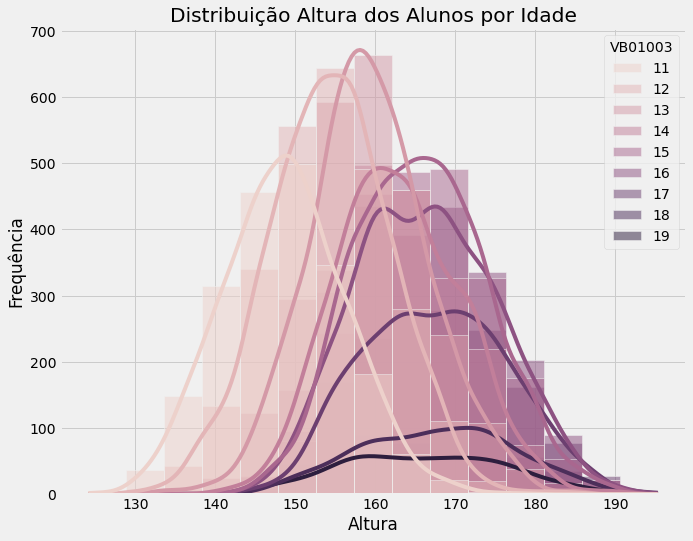

In [168]:
# criando nossa figura
plt.figure(figsize=(10,8))

# plotando nossos dados por oo
ax = sns.histplot(x='VB17004', data=dados, alpha=0.5, bins=15, kde=True, hue='VB01003')

# editando nosso gráfico
ax.set_title('Distribuição Altura dos Alunos por Idade')
ax.set_xlabel("Altura")
ax.set_ylabel("Frequência")
ax;

>Perceba que é muito ruim analisar um histograma quando tem muitas classes, pois fica muito bagunçado. Um tipo de gráfico muito útil quando temos várias classes é o boxplot.

>Vamos trabalhar com esse tipo de gráfico na seção abaixo.

#### Desafio 08: Fazer a análise com o histograma para outras informações da base de dados

Vamos ver a distribuição de peso dos alunos

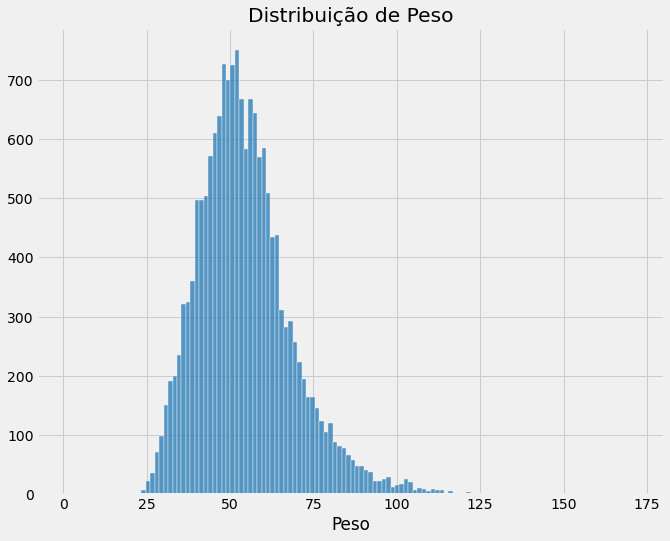

In [169]:
plt.figure(figsize=(10,8))
ax = sns.histplot(x='VB17003', data=dados)
ax.set_title('Distribuição de Peso')
ax.set_xlabel('Peso')
ax.set_ylabel('');

**Trabalhando com boxplot**

Boxplot é um tipo de gráfico muito interessante, pois traz várias informações agregadas.

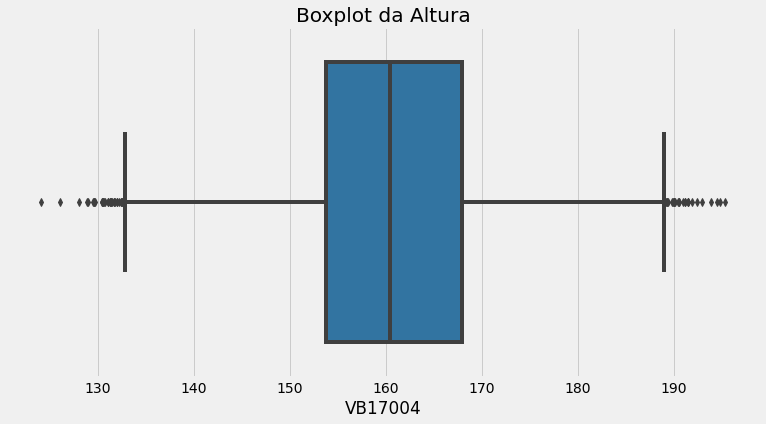

In [170]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='VB17004', data=dados)
ax.set_title('Boxplot da Altura')
ax;

>Algumas dessas informações agregadas são as seguintes:
>- Valor mínimo
    - Primeira linha vertical
    - Não é o valor mínimo da amostra
    - É o valor mínimo dentro da normalidade
>- Quartis
    - Primeiro Quartil - Segunda linha vertical
        - 25% dos meus dados estão abaixo dessa linha
        - No exemplo acima, 25% dos alunos tem até 153 centímetros de altura
    - Segundo Quartil - Terceira linha vertical
        - 50% dos meus dados estão abaixo dessa linha
        - Conhecida também como mediana
    - Terceiro Quartil - Quarta linha vertical
        - 75% dos dados abaixo dessa faixa
>- Valor máximo
    - Última linha vertical à direita
    - Assim como o valor mínimo, este é o valor máximo dentro da normalidade
    - O valor máximo de toda a amostra está dentro nos outliers
>- Mediana
    - Divide os dados ao meio
>- Outliers
    - São os pontos além e aquém das do máximo e mínimo respectivamente
    - Existe um cálculo específico baseado nos quartis para encontrar os outliers

In [171]:
# a função quantile calcula os quantis desejados do nosso conjunto de dados
# vejamos o exemplo abaixo
dados['VB17004'].quantile(0.80)

169.7

>Ou seja, 80% dos alunos tem até 169 centímetros

#### Desafio 09: Pesquisar como é determinado os outliers no seaborn

**Fazendo comparações com o boxplot**

Vamos visualizar o mesmo boxplot acima (de altura) relacionando com outro parâmetro, como idade ou sexo por exemplo.

A montagem do nosso boxplot será parecida com a anterior. Mas agora adicionamos o parâmetro y, pelo qual será feita a compração. 

Também adicionaremos o parâmetro orient, para informar ao seaborn para organizar o gráfico de forma horizontal. Se não passarmos este parâmetro, a orientação será considerada vertical e plotará um gráfico bagunçado. Quando visualizamos apenas 1 boxplot este parâmetro não precisa ser passado.

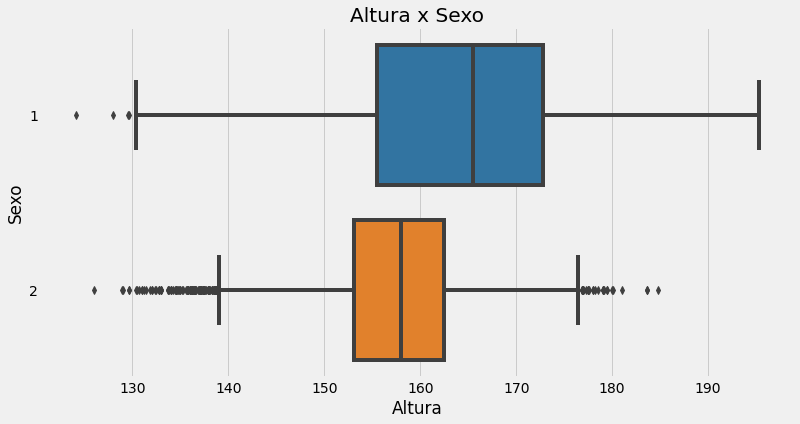

In [172]:
# rodando código abaixo teremos a altura no eixo x e o sexo no eixo y
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='VB17004', y='VB01001', data=dados, orient='h')
ax.set_title('Altura x Sexo')
ax.set_xlabel('Altura')
ax.set_ylabel('Sexo')
ax;

**Boxplot Altura x Idade**

Agora usaremos o boxplot para resolver o problema que tivemos com os histogramas. Ao tentar visualizar idade com o histograma, obtivemos muitas faixas e dificuldade para analisar.

Com o boxplot a comparação entre classes fica mais clara.

Para uma melhor visualização agora vamos colocar a altura no eixo y e idade no eixo x. Dessa forma os boxplots serão postados na orientação vertical.

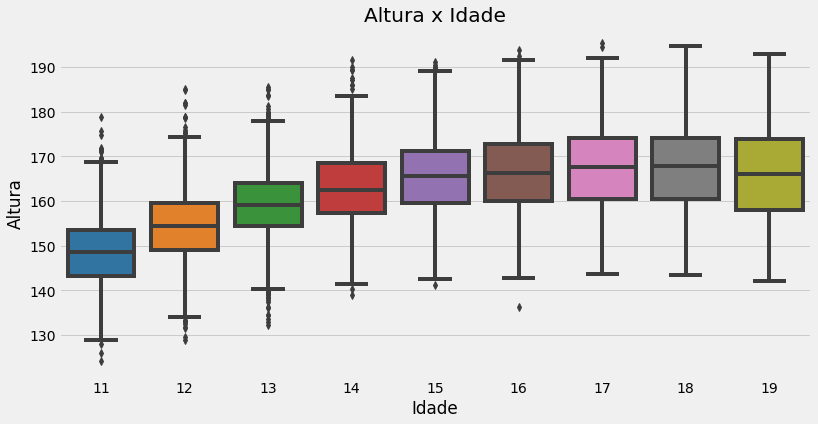

In [173]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='VB01003', y='VB17004', data=dados)
ax.set_title('Altura x Idade')
ax.set_xlabel('Idade')
ax.set_ylabel('Altura')
ax;

>Veja que com o boxplot a gente consegue visualizar o que não conseguíamos no histograma.

>Agora podemos ver a distribuição de cada uma das idades e podemos também fazer comparações.

**Adicionando 'Tonalidade'**

Agora vamos aprofundar um pouco mais na comparação usando o parâmetro hue.

Vamos adicionar o fator sexo para ver como as alturas se distribuem.

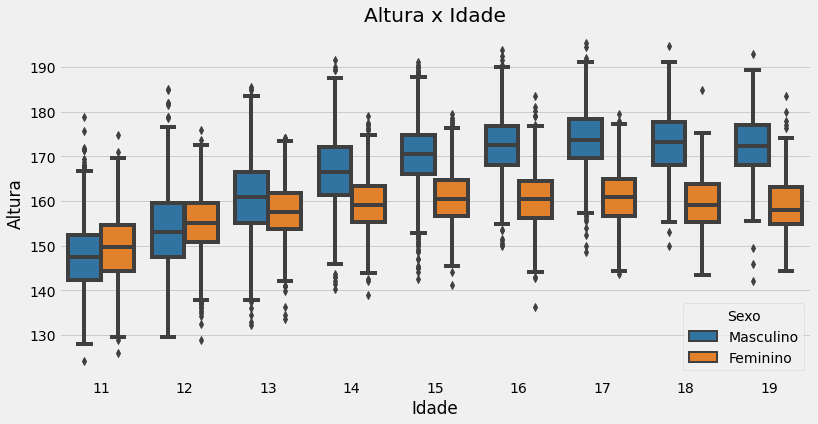

In [174]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='VB01003', y='VB17004', data=dados, hue='VB01001')
ax.set_title('Altura x Idade')
ax.set_xlabel('Idade')
ax.set_ylabel('Altura')
ax.legend(labels=['Masculino', 'Feminino'], handles=ax.get_legend_handles_labels()[0], title='Sexo')
ax;

>Uma observação interessante que este gráfica possibilita é que as mulheres crescem até os 13 anos e depois estabilizam.

>Já os homens tem um crescimento acentuado dos 11 aos 15 anos de idade.

>Outra observação é que após os 15 anos a diferença de altura entre os sexos aumenta bastante.

**Histograma Cumulativo**

Serve como outra forma para visualizarmos os quartis do boxplot.

Passamos o parâmetro cumulative como True. E depois passamos o argumento 'density' para stat. Dessa forma, o seaborn vai calcular as porcentagens para cada faixa de altura.

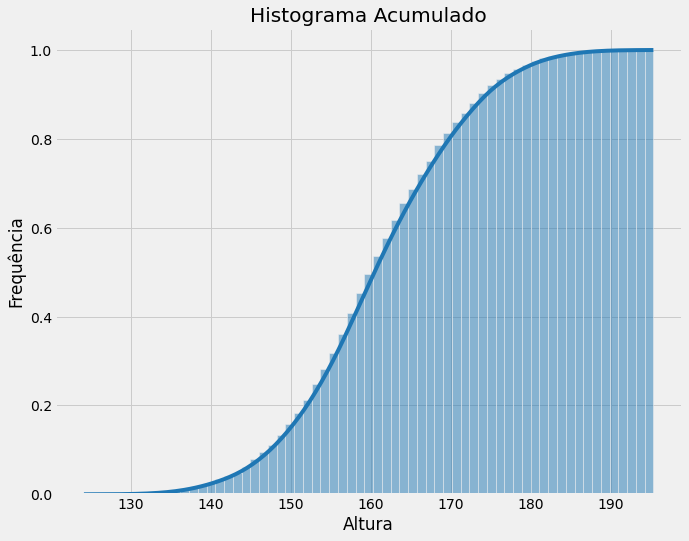

In [175]:
# criando nossa figura
plt.figure(figsize=(10,8))

# plotando nossos dados por oo
ax = sns.histplot(x='VB17004', data=dados, 
                  kde=True, 
                  cumulative=True,
                 stat='density')

# editando nosso gráfico
ax.set_title('Histograma Acumulado')
ax.set_xlabel("Altura")
ax.set_ylabel('Frequência')
ax;

>Traçando uma linha a partir do 0.2 no eixo y, uma das conclusões deste gráfico por exemplo é que aproximadamente 20% da nossa população tem até 153 cm de altura.

### Aula 05

Aqui vamos estudar um pouco sobre medidas de tendência central. Nosso objetivo é sumarizar nossos dados, ou seja, transformar um conjunto de vários números numa única medida. 

Uma das formas de fazer isso é calculando a média.

In [176]:
# calculando a média da altura de todos os alunos
dados['VB17004'].mean()

160.71311307078818

In [177]:
# calculando média de acordo com o sexo
# podemos fazer isso agrupando por classe, no caso sexo, e aplicando a fórmula da média
dados.groupby("VB01001")["VB17004"].mean()

VB01001
1   163.860758
2   157.558617
Name: VB17004, dtype: float64

>Para os dados qualitativos nós utilizamos a frequência e percentuais.

>Para os dados quantitativos nós utlizamos aqui no nosso exemplo as medidas de tendência cental como média, moda, mediana...

In [178]:
# por exemplo vamos calcular a moda da altura, ou seja, o valor mais frequente
dados["VB17004"].mode()

0   160.000000
dtype: float64

>Ou seja, o valor que mais aparece no meu conjunto de dados é 160 centímetros

In [179]:
# voltando ao groupby, vamos fazer o agrupamento por mais de uma variável
# neste caso vamos agrupar por sexo e idade e exibir as alturas
dados.groupby(["VB01001", "VB01003"])["VB17004"].mean()

VB01001  VB01003
1        11        147.617753
         12        153.696764
         13        160.719801
         14        166.406922
         15        170.336297
         16        172.424933
         17        173.814341
         18        173.024561
         19        172.143158
2        11        149.522512
         12        154.965021
         13        157.673105
         14        159.340320
         15        160.759848
         16        160.386527
         17        160.907937
         18        159.438462
         19        158.977193
Name: VB17004, dtype: float64

#### Desafio 11: Fazer o cálculo da média por sexo e idade, através do crosstab

Para replicar o exato resultado acima usando o crosstab vai exigir algumas adaptações para os seguintes parâmetros:

- columns:
    - Não pode ficar sem argumento
    - Devemos passar um espaço em branco para não dar erro quando rodamos o código
- index:
    - Para gerar multiíndice, vamos passar as 2 séries dentro de uma lista
- aggfunc:
    - Passaremos a função desejada, neste caso, média
- values:
    - Passaremos a série sobre a qual será aplicada a média

Após passar todos os parâmetros necessários vamos apagar o nome da coluna para ficar com a aparência limpa.

In [180]:
cross = pd.crosstab(index=[dados["VB01001"], dados["VB01003"]], 
            columns=" ", aggfunc='mean', values=dados["VB17004"])
cross.columns = [" "]
cross

VB01001 VB01003           
1       11      147.617753
        12      153.696764
        13      160.719801
        14      166.406922
        15      170.336297
        16      172.424933
        17      173.814341
        18      173.024561
        19      172.143158
2       11      149.522512
        12      154.965021
        13      157.673105
        14      159.340320
        15      160.759848
        16      160.386527
        17      160.907937
        18      159.438462
        19      158.977193

#### Super-desafio 01: Criar um dicionário para facilitar a busca da pergunta

Vamos limitar este super-desafio à duas das questões mais utilizadas aqui na nossa análise.

Estas questões serão VB17006 e VB01001 (sexo).

In [181]:
perguntas = {"VB17006":{"q":"Variável identificadora do estado nutricional do estudante, onde: déficit de peso=1",
                       "r":{1:"Deficit de peso", 2:"Eutrofia", 3:"Sobrepeso", 4:"Obesidade"}},
            "VB01001":{"q":"Qual é o seu sexo?", "r":{1:"Masculino", 2:"Feminino"}}}

Exemplo de uso:

In [182]:
perguntas["VB17006"]["r"]

{1: 'Deficit de peso', 2: 'Eutrofia', 3: 'Sobrepeso', 4: 'Obesidade'}

#### Super-desafio 02: De alguma maneira sumarizar algumas perguntas para ficar mais curta. Pode usar NLTK, GESIM ou qualquer biblioteca de processamento de linguagem natural 

**Medidas de Tendência Central**

Média

Apesar de ser uma boa medida de análise, a média tem a desvantagem de às vezes distorcer a realidade. Por exemplo, uma média de salários não quer dizer que todos daquele lugar ganham próximo da média. Poucas pessoas que tiverem um salário muito alto podem distorcer os números subindo a média e fazendo crer que todo o restante recebe próximo daquela média de salário. 

Vejamos isso retratado no exemplo abaixo:

In [183]:
salario_thiago = 9000
salario_allan = 1000

salario_media = (salario_thiago+salario_allan)/2
salario_media

5000.0

>A média é 5 mil, mas ela está bastante distante dos valores reais

Medidas de Dispersão

Para analisar a média de uma distribuição é sempre interessante acompanhá-las com alguma medida de dispersão. Essas medidas nos informarão o quão distante nossos valores estão da média.

In [184]:
# calculando média das alturas e criando nova coluna ao nosso DF
media_altura = dados['VB17004'].mean()
dados["MEDIA_ALTURA"] = media_altura

# calculando a diferença entre os valores reais e a média geral e criando nova coluna
# veja que alguns valores serão negativos, já que o valor de algumas alturas serão menores do que a média geral
diferenca_das_media = dados["VB17004"] - media_altura
dados["DIFERENCA_MEDIA"] = diferenca_das_media

# calculando o quadrado da diferença
# depois usaremos esta serie para calcular a variância, que é uma média deste conjunto de valores
diferenca_quadrado = diferenca_das_media**2
dados['DIFERENCA_QUADRADO'] = diferenca_quadrado

# visualizando as colunas juntas
dados[["VB17004", "MEDIA_ALTURA", "DIFERENCA_MEDIA", 'DIFERENCA_QUADRADO']]

,VB17004,MEDIA_ALTURA,DIFERENCA_MEDIA,DIFERENCA_QUADRADO
0,157.000000,160.713113,-3.713113,13.787209
1,152.000000,160.713113,-8.713113,75.918339
2,161.400000,160.713113,0.686887,0.471814
3,172.500000,160.713113,11.786887,138.930703
4,167.500000,160.713113,6.786887,46.061834
...,...,...,...,...
16551,167.900000,160.713113,7.186887,51.651344
16552,185.800000,160.713113,25.086887,629.351896
16553,159.400000,160.713113,-1.313113,1.724266
16554,157.800000,160.713113,-2.913113,8.486228


In [185]:
# calculando a variancia
# note que a variancia é de toda a amostra, não da população
# vamos calcular a variancia amostral na célula abaixo
dados['DIFERENCA_QUADRADO'].mean()

106.9105945368652

In [186]:
# calculando variancia amostral
variancia_amostral = (1/(len(dados)-1)) * dados["DIFERENCA_QUADRADO"].sum()
variancia_amostral

106.91705244049118

In [187]:
print(f"A minha média é {dados['VB17004'].mean()}, com variancia amostral de {variancia_amostral}.")

A minha média é 160.71311307078818, com variancia amostral de 106.91705244049118.


>Veja que somente a variancia amostral não nos ajuda muito em perceber a dispersão. A partir da nossa medida de variancia amostral precisamos chegar a um número mais preciso.

>Esta medida chama-se desvio padrão.

Calculando o desvio padrão

In [188]:
desvio_padrao = np.sqrt(variancia_amostral)
desvio_padrao

10.340070233827776

>Ou seja, nossa média é de 160.7 com desvio padrão de 10.3 para mais e para menos

>Agora temos uma noção mais precisa do quão longe nossos pontos estão da média

In [189]:
print(f"Os números da nossa amostra variam entre {dados['VB17004'].mean() - desvio_padrao} e {dados['VB17004'].mean() + desvio_padrao}")

Os números da nossa amostra variam entre 150.3730428369604 e 171.05318330461597


### Aula 06

**Intervalo de Confiança (IC)**

No caso da altura, como podemos saber o quanto nossa amostra representa o mundo real? O IC nos auxilia nessa situação.

A partir do IC podemos fazer inferências sobre o mundo real.

[Link para estudos sobre o tema](https://www.notion.so/Intervalo-de-Confian-a-0889e6bead8347fba832d142d02f4402)

In [190]:
# primeiro precisaremos importar a biblioteca que statsmodel para nos auxiliar
# o primeiro tipo de teste que usaremos será o ztest
from statsmodels.stats.weightstats import zconfint

In [191]:
# basta passarmos o conjunto de dados como argumento do método zconfint
# veja que devemos transformar a serie em lista 
zconfint(dados['VB17004'].to_list())

(160.5556082427712, 160.87061789880892)

>Veja que o método zconfint nos retornou um intervalo de confiança de 95%

>Ou seja, existe 95% de chance de uma média de determinada amostra estar dentro deste intervalo

alpha == nível de significância
- Porcentagem de o parâmetro não estar dentro do IC

gama = nível de confiança
- Porcentagem de o parâmetro estar dentro do IC

alpha + gama = 100%

In [192]:
# agora vamos usar o ttest para medir o IC
from statsmodels.stats.weightstats import DescrStatsW

In [193]:
# diferente do zteste, com este precisamos instanciar
descricao_altura = DescrStatsW(dados["VB17004"])

In [194]:
# depois de instanciado vamos chamar o método de cálculo de IC a partir do ttest
descricao_altura.tconfint_mean()

(160.55559672649292, 160.87062941508714)

>Da mesma forma que fizemos com o zteste, podemos também fazer uma inferência a partir do ttest

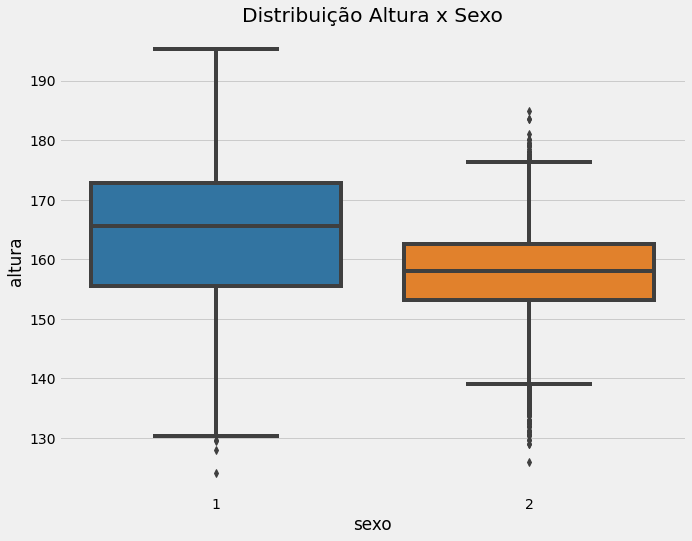

In [201]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='VB01001', y='VB17004', data=dados)
ax.set_title('Distribuição Altura x Sexo')
ax.set_xlabel('sexo')
ax.set_ylabel('altura');

Será que a diferença das médias de ambos sexos é estatisticamente relevante?

Vamos aplicar o teste Z para chegar a essa reposta. O teste Z é usado na estatística para verificar se as médias de duas amostras são iguais. A hipótese nula (hipótese principal) assume que não existe diferença entre as médias.

Dentro do statsmodels existe um módulo que nos auxilia nesse cálculo.

O resultado do cálculo vai nos retornar uma tupla com o valor do pvalue. O valor do pvalue tem que ser superior a 0.05 para que aceitemos a hipótese nula como verdadeira, ou seja, que os valores das médias são estatisticamente iguais.

In [202]:
from statsmodels.stats.weightstats import ztest

In [205]:
distribuicao_altura_m = dados.query("VB01001 == 1")['VB17004']
distribuicao_altura_f = dados.query("VB01001 == 2")['VB17004']

ztest(distribuicao_altura_m, distribuicao_altura_f)

(41.16851708819389, 0.0)

>Veja que o resultado de ztest é uma tupla, onde o número que nos interessa no momento é o segundo elemento, conhecido como p value

In [207]:
# dando nomes aos bois
_, p_value = ztest(distribuicao_altura_m, distribuicao_altura_f)
p_value

0.0

>Dado o valor de pvalue acima, concluimos que a diferença entre as médias são estatisticamente diferentes.

Só para comparar, vamos fazer um teste abaixo comparando 2 conjuntos de dados iguais. Dessa forma, as médias dos conjuntos serão também iguais e portanto o valor de pvalue será maior que 0.05 

In [209]:
_, p_value = ztest(distribuicao_altura_m, distribuicao_altura_m)
p_value

1.0

Note que o teste Z assume algumas premissas para que seja aplicado. As 2 das principais premissas são:
- O tamanho da amostra (n) tem que ser maior que 30
- A distribuição deve ser normal

Existe um método para verificarmos a normalidade de uma distribuição. Para isso usaremos a biblioteca scipy.

In [210]:
from scipy.stats import normaltest

In [246]:
# verificando se a curva é normal
_, pvalue_normal_m = normaltest(distribuicao_altura_m)
_, pvalue_normal_f = normaltest(distribuicao_altura_f)

print(f"pvalue_testenormal_masculino: {pvalue_normal_m} \n pvalue_testenormal_feminino: {pvalue_normal_f}")

pvalue_testenormal_masculino: 7.695118853996524e-75 
 pvalue_testenormal_feminino: 7.125189471020874e-47


>A hipótese nula para esse teste é de que se o pvalue for maior que 0.05, trata-se de uma distribuição normal. Caso pvalue seja menor que 0.05, nós descartamos a hipótese nula e aceitamos a hipótese alternativa.

>No caso acima, a amostra testada não é uma distribuição normal já que pvalue é muito menor que 0.05

>Note que, apenas observando o gráfico, a distribuição das alturas entre o sexo feminino parece uma distribuição normal. No entanto, ao fazer o teste comprovamos que não se trata de uma distribuição normal. Dessa forma, não é recomendado aplicarmos o teste Z nessa situação, já que uma das suas premissas é que a distribuição seja normal.

#### Desafio: Realizar teste de hipóteses de outras colunas e explorar a base de dados

**Testes não paramétricos**

Vamos agora fazer alguns testes não paraméricos. Usaremos o ranksums.

In [250]:
from scipy.stats import ranksums

In [253]:
ranksums(distribuicao_altura_m, distribuicao_altura_f)

RanksumsResult(statistic=40.7525576033863, pvalue=0.0)

Através o pvalue menor que 0.05, o teste ranksums informa que a hipótese nula deve ser rejeitada.

Mas qual é a hipótese nula do ranksums? Ele verifica se os 2 conjuntos de dados fornecidos são proveninetes da mesma distribuição. A hipótese alternativa é a de que valores de uma amostra tendem a ser maiores do que valores da outra amostra.

Os testes de hipótese servem para comprovar algo que aparentemente os gráficos estão nos falando. Por exemplo, batendo o olho num histograma podemos assumir que dada distribuição é normal, mas quando fazemos o teste ela não é. Olhando os gráficos somos capazes de criar apenas hipóteses, por mais 'claro' que esteja a informação nele (a de distribuição normal por exemplo), somentes com os testes podemos ter certeza.

In [256]:
len(distribuicao_altura_m)

8287

# Modulo 4

### Aula 01

**O que são séries temporais**



In [1]:
lista = [18, 'Kaio', '19', True]
for el in lista:
    print(f'O elemento {el} é do tipo: {type(el)}')

O elemento 18 é do tipo: <class 'int'>
O elemento Kaio é do tipo: <class 'str'>
O elemento 19 é do tipo: <class 'str'>
O elemento True é do tipo: <class 'bool'>
